In [1]:
import contextily as ctx
import matplotlib.pyplot as plt
import findspark
import pandas as pd
path = '/home/danial/Desktop/mygis/Geospatial_Data_Science/My GIS Projects/'

In [2]:
findspark.init("/home/danial/spark-3.4.0-bin-hadoop3")

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql import functions as F
from pyspark.sql.functions import sum
from pyspark.sql.functions import to_date, concat, lit, col
from pyspark.sql.functions import month
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import desc


In [4]:
# To startup the SparkSession with JDBC driver (required to interact with SQLite databases using Spark)

spark = SparkSession.builder.config('spark.jars.packages', 'org.xerial:sqlite-jdbc:3.42.0.0').getOrCreate()

23/06/15 18:24:48 WARN Utils: Your hostname, danial-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/06/15 18:24:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/danial/spark-3.4.0-bin-hadoop3/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/danial/.ivy2/cache
The jars for the packages stored in: /home/danial/.ivy2/jars
org.xerial#sqlite-jdbc added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-d6ecca65-ddf5-47ef-b587-76e88fa250c9;1.0
	confs: [default]
	found org.xerial#sqlite-jdbc;3.42.0.0 in central
:: resolution report :: resolve 261ms :: artifacts dl 4ms
	:: modules in use:
	org.xerial#sqlite-jdbc;3.42.0.0 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   1   |   0   |   0   |   0   ||   1   |   0   |
	---------------------------------------------------------------------
:: retrieving :: org.apache.spark#spark-submit-parent-d6ecca65-ddf5-47ef-b587-76e88fa250c9
	confs: [defau

In [5]:
df_spark = spark.read.format('jdbc').options(driver='org.sqlite.JDBC', \
                                             inferSchema = True,\
                                             header = True,\
                                             dbtable = 'fires',\
                                             url= 'jdbc:sqlite:/home/danial/Desktop/mygis/Geospatial_Data_Science/My GIS Projects/data/3.1.88_M_US_Wildfires/FPA_FOD_20170508.sqlite').load()


In [6]:
df_spark.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- FOD_ID: decimal(38,18) (nullable = true)
 |-- FPA_ID: string (nullable = true)
 |-- SOURCE_SYSTEM_TYPE: string (nullable = true)
 |-- SOURCE_SYSTEM: string (nullable = true)
 |-- NWCG_REPORTING_AGENCY: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_ID: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_NAME: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT_NAME: string (nullable = true)
 |-- LOCAL_FIRE_REPORT_ID: string (nullable = true)
 |-- LOCAL_INCIDENT_ID: string (nullable = true)
 |-- FIRE_CODE: string (nullable = true)
 |-- FIRE_NAME: string (nullable = true)
 |-- ICS_209_INCIDENT_NUMBER: string (nullable = true)
 |-- ICS_209_NAME: string (nullable = true)
 |-- MTBS_ID: string (nullable = true)
 |-- MTBS_FIRE_NAME: string (nullable = true)
 |-- COMPLEX_NAME: string (nullable = true)
 |-- FIRE_YEAR: decimal(38,18) (nullable = true)
 |-- DISCOVERY_DATE: decimal(38,18) (null

In [7]:
df_spark.select('STATE', 'FIRE_YEAR', 'DISCOVERY_DOY', 'CONT_DOY', 'STAT_CAUSE_DESCR', 'LONGITUDE',\
               'LATITUDE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS').printSchema()

root
 |-- STATE: string (nullable = true)
 |-- FIRE_YEAR: decimal(38,18) (nullable = true)
 |-- DISCOVERY_DOY: decimal(38,18) (nullable = true)
 |-- CONT_DOY: decimal(38,18) (nullable = true)
 |-- STAT_CAUSE_DESCR: string (nullable = true)
 |-- LONGITUDE: decimal(38,18) (nullable = true)
 |-- LATITUDE: decimal(38,18) (nullable = true)
 |-- FIRE_SIZE: decimal(38,18) (nullable = true)
 |-- FIRE_SIZE_CLASS: string (nullable = true)



In [8]:
df_spark.select('FIRE_SIZE_CLASS').distinct().show()

+---------------+
|FIRE_SIZE_CLASS|
+---------------+
|              F|
|              E|
|              B|
|              D|
|              C|
|              A|
|              G|
+---------------+



In [9]:
df_spark.count()

1880465

In [ ]:
df_spark.select(|**STATE**|**FIRE_YEAR** | **DISCOVERY_DOY**|  **CONT_DOY**| **STAT_CAUSE_DESCR**|
|**LONGITUDE**|**LATITUDE** | **FIRE_SIZE**|  **FIRE_SIZE_CLASS**|
)

23/06/06 15:59:53 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


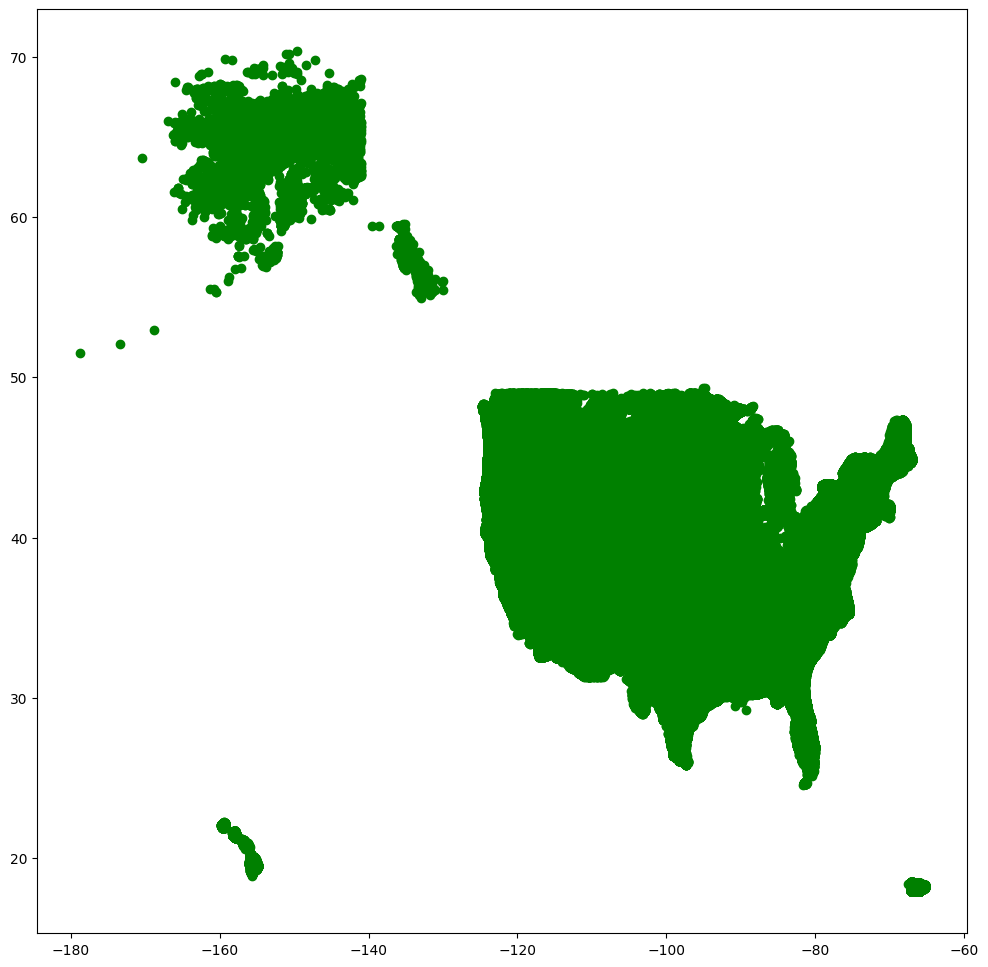

In [17]:
# Convert Spark DataFrame to a temporary view
df_spark.createOrReplaceTempView("data")

# Extract latitude and longitude columns from the Spark DataFrame
latitude = df_spark.select("LATITUDE").rdd.flatMap(lambda x: x).collect()
longitude = df_spark.select("LONGITUDE").rdd.flatMap(lambda x: x).collect()

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(longitude, latitude, c='green')

# Show the plot
plt.show()


In [269]:
# Select the latitude and longitude columns
latitude = df_spark.select('LATITUDE').rdd.flatMap(lambda x: x).collect()
longitude = df_spark.select('LONGITUDE').rdd.flatMap(lambda x: x).collect()

# Set up the plot
min_long, max_long = min(longitude), max(longitude)
min_lat, max_lo = min(latitude), max(latitude)


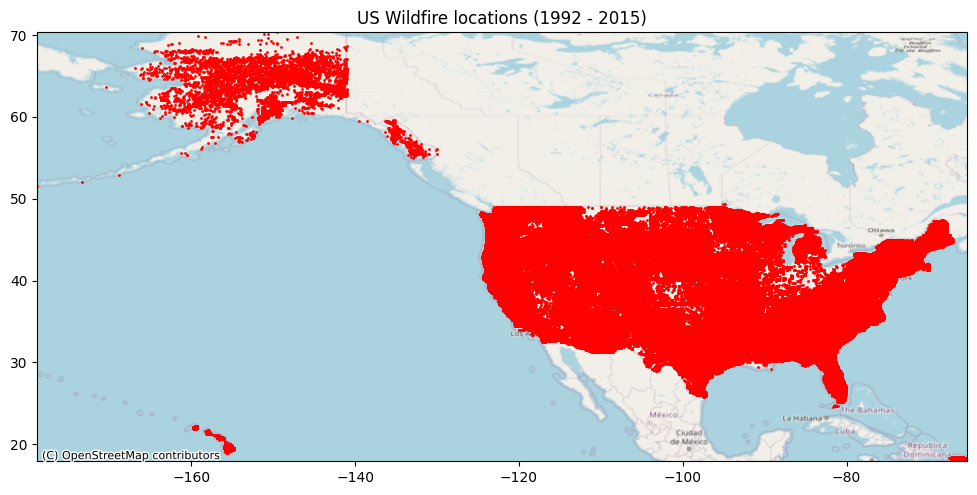

In [22]:

# Select the latitude and longitude columns
latitude = df_spark.select('LATITUDE').rdd.flatMap(lambda x: x).collect()
longitude = df_spark.select('LONGITUDE').rdd.flatMap(lambda x: x).collect()

# Set up the plot
min_long, max_long = min(longitude), max(longitude)
min_lat, max_lo = min(latitude), max(latitude)

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(min(longitude), max(longitude))
ax.set_ylim(min(latitude), max(latitude))

# Add the basemap using contextily
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Plot the scatter points
ax.scatter(longitude, latitude, c='red', s=1)

# Show the plot
plt.title('US Wildfire locations (1992 - 2015)')
plt.show()
#plt.savefig('plots/US_Wildfire_locations_1992_2015.png')
# Close the SparkSession
spark.stop()


In [16]:
df_spark.select('LONGITUDE', 'LATITUDE','FIRE_SIZE', 'FIRE_SIZE_CLASS').show()

+--------------------+--------------------+--------------------+---------------+
|           LONGITUDE|            LATITUDE|           FIRE_SIZE|FIRE_SIZE_CLASS|
+--------------------+--------------------+--------------------+---------------+
|-121.005833330000...|40.03694444000000...|0.100000000000000000|              A|
|-120.404444440000...|38.93305556000000...|0.250000000000000000|              A|
|-120.735555560000...|38.98416667000000...|0.100000000000000000|              A|
|-119.913333330000...|38.55916667000000...|0.100000000000000000|              A|
|-119.933055560000...|38.55916667000000...|0.100000000000000000|              A|
|-120.103611110000...|38.63527778000000...|0.100000000000000000|              A|
|-120.153333330000...|38.68833333000000...|0.100000000000000000|              A|
|-122.433888890000...|40.96805556000000...|0.800000000000000000|              B|
|-122.283333330000...|41.23361111000000...|1.000000000000000000|              B|
|-120.149166670000...|38.548

In [17]:
df_spark.select('STATE','FIRE_YEAR', 'DISCOVERY_DOY', 'CONT_DOY','STAT_CAUSE_DESCR').show()

+-----+--------------------+--------------------+--------------------+----------------+
|STATE|           FIRE_YEAR|       DISCOVERY_DOY|            CONT_DOY|STAT_CAUSE_DESCR|
+-----+--------------------+--------------------+--------------------+----------------+
|   CA|2005.000000000000...|33.00000000000000...|33.00000000000000...|   Miscellaneous|
|   CA|2004.000000000000...|133.0000000000000...|133.0000000000000...|       Lightning|
|   CA|2004.000000000000...|152.0000000000000...|152.0000000000000...|  Debris Burning|
|   CA|2004.000000000000...|180.0000000000000...|185.0000000000000...|       Lightning|
|   CA|2004.000000000000...|180.0000000000000...|185.0000000000000...|       Lightning|
|   CA|2004.000000000000...|182.0000000000000...|183.0000000000000...|       Lightning|
|   CA|2004.000000000000...|183.0000000000000...|184.0000000000000...|       Lightning|
|   CA|2005.000000000000...|67.00000000000000...|67.00000000000000...|  Debris Burning|
|   CA|2005.000000000000...|74.0

In [16]:
df_spark.select('COUNTY','STATE', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS').describe().show()

+-------+-----------------+-------+----------------+--------------------+------------------+--------------------+---------------+
|summary|           COUNTY|  STATE|STAT_CAUSE_DESCR|      DISCOVERY_DATE|    DISCOVERY_TIME|           FIRE_SIZE|FIRE_SIZE_CLASS|
+-------+-----------------+-------+----------------+--------------------+------------------+--------------------+---------------+
|  count|          1202317|1880465|         1880465|             1880465|            997827|             1880465|        1880465|
|   mean|43.72427478281645|   null|            null|2453063.657027118...|1453.0143261306819|74.52015833992390...|           null|
| stddev|41.92782842806354|   null|            null|   2434.573159185869| 405.9609625656342|   2497.598179796961|           null|
|    min|              001|     AK|           Arson|2448622.500000000...|              0000|0.000010000000000000|              A|
|    max|          yankton|     WY|       Structure|2457387.500000000...|              235

In [21]:
FIRE_SIZE_CLASS_UNIQUES = df_spark.select('FIRE_SIZE_CLASS').distinct().collect()
for one_row in FIRE_SIZE_CLASS_UNIQUES:
    print (one_row[0])

F
E
B
D
C
A
G


In [68]:
df_spark.groupBy('FIRE_SIZE_CLASS').count().show()

+---------------+------+
|FIRE_SIZE_CLASS| count|
+---------------+------+
|              F|  7786|
|              E| 14107|
|              B|939376|
|              D| 28427|
|              C|220077|
|              A|666919|
|              G|  3773|
+---------------+------+



In [69]:
df_spark.groupBy('FIRE_SIZE_CLASS').agg(F.avg('FIRE_SIZE')).show()


+---------------+--------------------+
|FIRE_SIZE_CLASS|      avg(FIRE_SIZE)|
+---------------+--------------------+
|              F|2130.395128422810...|
|              E|512.8549039420146...|
|              B|2.146998274939960...|
|              D|161.8010338723748...|
|              C|28.53191445355943...|
|              A|0.118801012820147...|
|              G|27388.19070278293...|
+---------------+--------------------+



In [77]:
df_spark.groupBy('FIRE_SIZE_CLASS').agg(F.avg('FIRE_SIZE')).dtypes

[('FIRE_SIZE_CLASS', 'string'), ('avg(FIRE_SIZE)', 'decimal(38,22)')]

In [29]:
# Perform the groupBy and aggregation
result_df = df_spark.groupBy('FIRE_SIZE_CLASS').agg(F.avg('FIRE_SIZE')).toPandas()
result_df_ordered = result_df.sort_values(by='FIRE_SIZE_CLASS')
result_df_ordered

,FIRE_SIZE_CLASS,avg(FIRE_SIZE)
5,A,0.1188010128201475741432
2,B,2.1469982749399601437680
4,C,28.5319144535594360158399
3,D,161.8010338723748548921800
1,E,512.8549039420146026795208
0,F,2130.3951284228101721037760
6,G,27388.1907027829313543599258


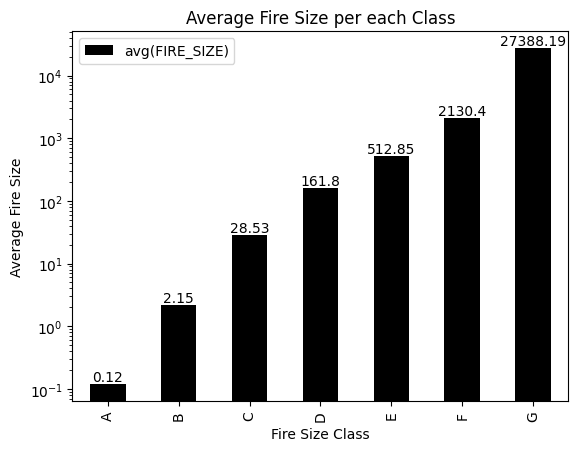

In [35]:

# Convert the average fire size column to a numeric data type
result_df_ordered['avg(FIRE_SIZE)'] = result_df_ordered['avg(FIRE_SIZE)'].astype(float)

# Plot the histogram with log scale on y-axis
ax = result_df_ordered.plot(x='FIRE_SIZE_CLASS', y='avg(FIRE_SIZE)', kind='bar', color='black')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Fire Size Class')
plt.ylabel('Average Fire Size')
plt.title('Average Fire Size per each Class')

# Write the value of each bar on top and round to 2 decimal places
for p in ax.patches:
    value = round(p.get_height(), 2)
    ax.annotate(str(value), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

#plt.savefig('plots/Average_Fire_Size_per_each_Class.png')
plt.show()


In [37]:
df_spark.groupBy('STATE').count().show(n=100)


+-----+------+
|STATE| count|
+-----+------+
|   AZ| 71586|
|   SC| 81315|
|   LA| 30013|
|   MN| 44769|
|   NJ| 25949|
|   DC|    66|
|   OR| 61088|
|   VA| 21833|
|   RI|   480|
|   WY| 14166|
|   KY| 27089|
|   NH|  2452|
|   MI| 10502|
|   NV| 16956|
|   WI| 31861|
|   ID| 36698|
|   CA|189550|
|   NE|  7973|
|   CT|  4976|
|   MT| 40767|
|   NC|111277|
|   VT|   456|
|   MD|  3622|
|   DE|   171|
|   MO| 17953|
|   IL|  2327|
|   ME| 13150|
|   WA| 33513|
|   ND| 15201|
|   MS| 79230|
|   AL| 66570|
|   IN|  2098|
|   OH|  3479|
|   TN| 31154|
|   NM| 37478|
|   IA|  4134|
|   PA|  8712|
|   SD| 30963|
|   NY| 80870|
|   TX|142021|
|   WV| 21967|
|   GA|168867|
|   MA|  2626|
|   KS|  7673|
|   CO| 34157|
|   FL| 90261|
|   AK| 12843|
|   AR| 31663|
|   OK| 43239|
|   PR| 22081|
|   UT| 30725|
|   HI|  9895|
+-----+------+



In [100]:
df_spark.select('STATE').distinct().count()

52

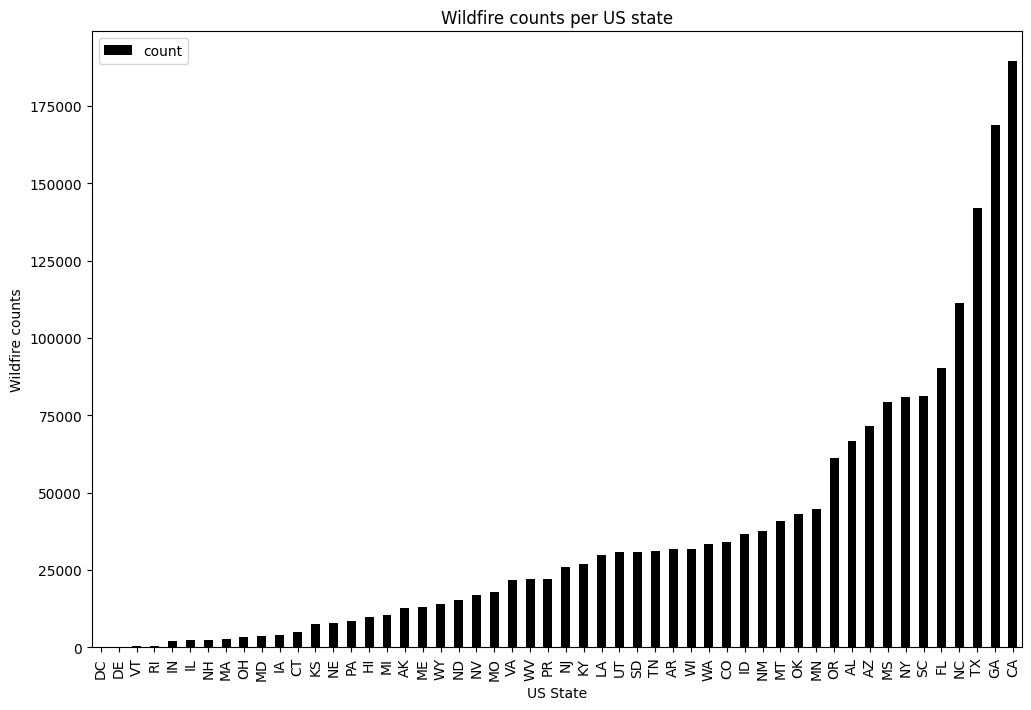

In [110]:

# Convert the average fire size column to a numeric data type
df_pandas = df_spark.groupBy('STATE').count().toPandas()

df_pandas_ordered = df_pandas.sort_values(by='count')


# Plot the histogram with log scale on y-axis
ax = df_pandas_ordered.plot(x='STATE', y='count', kind='bar', color='black', figsize=(12, 8))
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('US State')
plt.ylabel('Wildfire counts')
plt.title('Wildfire counts per US state')

plt.savefig('plots/Wildfire_counts_per_US_state.png')
#plt.show()


In [57]:
df_spark.select('STAT_CAUSE_DESCR').distinct().show()

+-----------------+
| STAT_CAUSE_DESCR|
+-----------------+
|    Miscellaneous|
|          Smoking|
|        Lightning|
|         Campfire|
|            Arson|
|   Debris Burning|
|         Railroad|
|        Powerline|
|Missing/Undefined|
|        Structure|
|         Children|
|        Fireworks|
|    Equipment Use|
+-----------------+



In [104]:
df_spark.groupBy('STAT_CAUSE_DESCR').count().show()

+-----------------+------+
| STAT_CAUSE_DESCR| count|
+-----------------+------+
|    Miscellaneous|323805|
|          Smoking| 52869|
|        Lightning|278468|
|         Campfire| 76139|
|            Arson|281455|
|   Debris Burning|429028|
|         Railroad| 33455|
|        Powerline| 14448|
|Missing/Undefined|166723|
|        Structure|  3796|
|         Children| 61167|
|        Fireworks| 11500|
|    Equipment Use|147612|
+-----------------+------+



In [58]:

# Compute the total count of all rows
total_count = df_spark.count()

# Perform the groupBy and aggregation
result_df = df_spark.groupBy('STAT_CAUSE_DESCR').count()
#result_df.show()
# Calculate the percentage
result_df = result_df.withColumn('percentage', (col('count') / total_count) * 100)

# Show the result
result_df.show()


+-----------------+------+-------------------+
| STAT_CAUSE_DESCR| count|         percentage|
+-----------------+------+-------------------+
|    Miscellaneous|323805| 17.219411156283154|
|          Smoking| 52869|  2.811485457054505|
|        Lightning|278468| 14.808464927557813|
|         Campfire| 76139|  4.048945340647127|
|            Arson|281455| 14.967308617815275|
|   Debris Burning|429028| 22.814995227244324|
|         Railroad| 33455|   1.77908123788531|
|        Powerline| 14448| 0.7683206015533393|
|Missing/Undefined|166723|  8.866051747838966|
|        Structure|  3796|0.20186496425086348|
|         Children| 61167|  3.252759290920065|
|        Fireworks| 11500| 0.6115508664080427|
|    Equipment Use|147612|  7.849760564541216|
+-----------------+------+-------------------+



In [59]:
result_df_ordered = result_df.toPandas().sort_values(by='percentage')
result_df_ordered

,STAT_CAUSE_DESCR,count,percentage
9,Structure,3796,0.201865
11,Fireworks,11500,0.611551
7,Powerline,14448,0.768321
6,Railroad,33455,1.779081
1,Smoking,52869,2.811485
10,Children,61167,3.252759
3,Campfire,76139,4.048945
12,Equipment Use,147612,7.849761
8,Missing/Undefined,166723,8.866052
2,Lightning,278468,14.808465


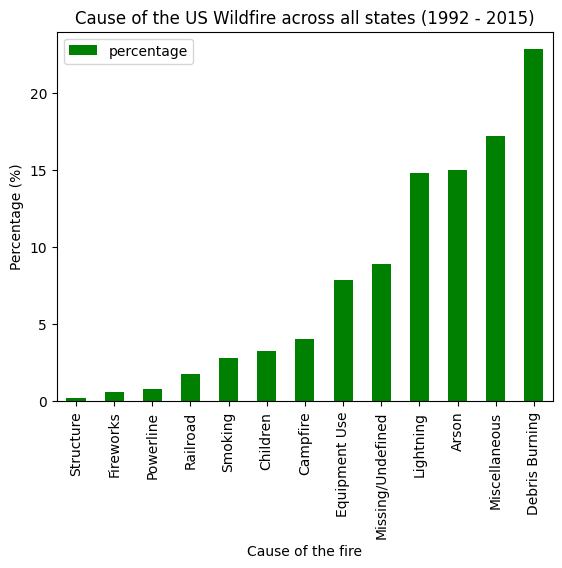

In [66]:
# Plot the histogram with log scale on y-axis
result_df_ordered.plot(x='STAT_CAUSE_DESCR', y='percentage', kind='bar', color = 'green')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('Percentage (%)')
plt.title('Cause of the US Wildfire across all states (1992 - 2015)')
#plt.savefig('plots/Cause_of_US_Wildfire_across_all_states_1992_2015.png')
plt.show()

In [71]:
df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().show()

+-----+-----------------+-----+
|STATE| STAT_CAUSE_DESCR|count|
+-----+-----------------+-----+
|   VA|   Debris Burning| 7215|
|   GA|Missing/Undefined|   10|
|   DE|        Fireworks|    1|
|   GA|        Structure|    2|
|   PA|        Structure|    5|
|   WV|        Lightning|  265|
|   CT|    Miscellaneous| 2714|
|   PR|Missing/Undefined|21821|
|   ID|         Campfire| 1986|
|   IN|    Equipment Use|   98|
|   WY|            Arson|  265|
|   ND|          Smoking|   90|
|   MD|   Debris Burning|  837|
|   VT|         Children|    5|
|   MT|          Smoking|  885|
|   CO|         Children|  208|
|   LA|        Fireworks|   80|
|   AZ|        Lightning|28776|
|   PA|         Campfire|  498|
|   AK|            Arson|  458|
+-----+-----------------+-----+
only showing top 20 rows



In [118]:
ca = df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().filter(df_spark['STATE'] == 'CA')
ca_t = df_spark.groupBy('STATE').count().filter(df_spark['STATE'] == 'CA')
ca_total = ca_t.select('count').collect()[0]['count']

ca = ca.withColumn('percentage', (col('count') / ca_total * 100))
#ca.show()

ca_pandas = ca.toPandas()
ca_pandas

,STATE,STAT_CAUSE_DESCR,count,percentage
0,CA,Fireworks,219,0.115537
1,CA,Miscellaneous,51943,27.403324
2,CA,Debris Burning,14318,7.553680
3,CA,Powerline,1198,0.632023
4,CA,Structure,123,0.064891
5,CA,Equipment Use,39407,20.789765
6,CA,Campfire,9516,5.020311
7,CA,Arson,19635,10.358744
8,CA,Missing/Undefined,12605,6.649960
9,CA,Lightning,27000,14.244263


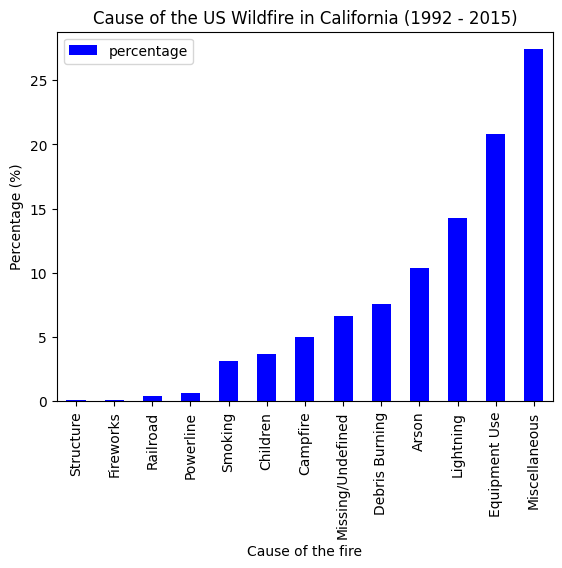

In [133]:
ca_pandas_ordered = ca_pandas.sort_values(by='percentage')

ca_pandas_ordered.plot(x='STAT_CAUSE_DESCR', y='percentage', kind='bar', color = 'blue')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('Percentage (%)')
plt.title('Cause of the US Wildfire in California (1992 - 2015)')
#plt.savefig('plots/Cause_of_US_Wildfire_in_CA_1992_2015.png')
plt.show()

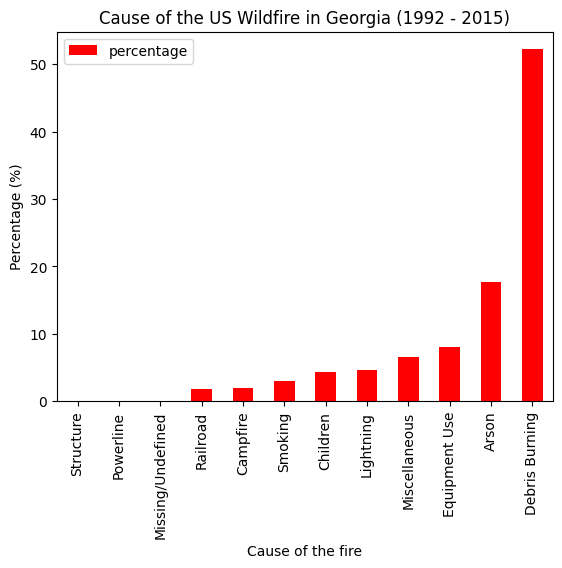

In [134]:
ga = df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().filter(df_spark['STATE'] == 'GA')
ga_t = df_spark.groupBy('STATE').count().filter(df_spark['STATE'] == 'GA')
ga_total = ga_t.select('count').collect()[0]['count']

ga = ga.withColumn('percentage', (col('count') / ga_total * 100))
#ca.show()

ga_pandas = ga.toPandas()


ga_pandas_ordered = ga_pandas.sort_values(by='percentage')

ga_pandas_ordered.plot(x='STAT_CAUSE_DESCR', y='percentage', kind='bar', color = 'red')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('Percentage (%)')
plt.title('Cause of the US Wildfire in Georgia (1992 - 2015)')
#plt.savefig('plots/Cause_of_US_Wildfire_in_GA_1992_2015.png')
plt.show()

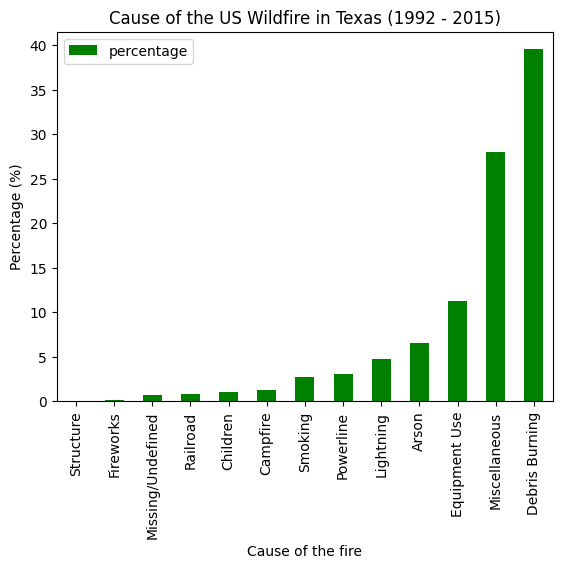

In [135]:
tx = df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().filter(df_spark['STATE'] == 'TX')
tx_t = df_spark.groupBy('STATE').count().filter(df_spark['STATE'] == 'TX')
tx_total = tx_t.select('count').collect()[0]['count']

tx = tx.withColumn('percentage', (col('count') / tx_total * 100))
#ca.show()

tx_pandas = tx.toPandas()


tx_pandas_ordered = tx_pandas.sort_values(by='percentage')

tx_pandas_ordered.plot(x='STAT_CAUSE_DESCR', y='percentage', kind='bar', color = 'green')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('Percentage (%)')
plt.title('Cause of the US Wildfire in Texas (1992 - 2015)')
#plt.savefig('plots/Cause_of_US_Wildfire_in_TX_1992_2015.png')
plt.show()

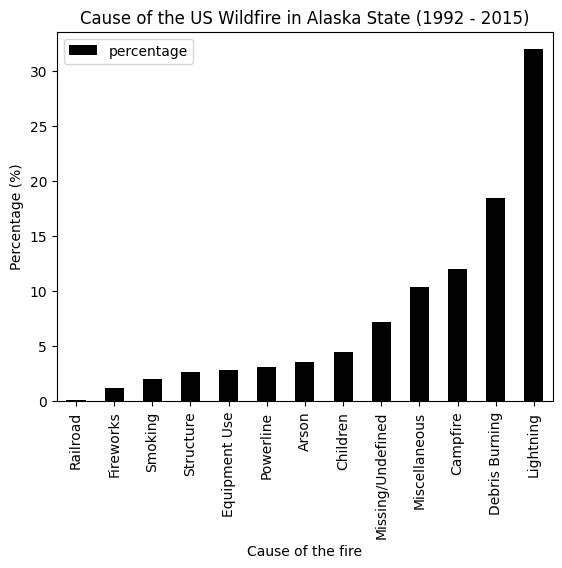

In [136]:
ak = df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().filter(df_spark['STATE'] == 'AK')
ak_t = df_spark.groupBy('STATE').count().filter(df_spark['STATE'] == 'AK')
ak_total = ak_t.select('count').collect()[0]['count']

ak = ak.withColumn('percentage', (col('count') / ak_total * 100))
#ca.show()

ak_pandas = ak.toPandas()


ak_pandas_ordered = ak_pandas.sort_values(by='percentage')

ak_pandas_ordered.plot(x='STAT_CAUSE_DESCR', y='percentage', kind='bar', color = 'black')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('Percentage (%)')
plt.title('Cause of the US Wildfire in Alaska State (1992 - 2015)')
#plt.savefig('plots/Cause_of_US_Wildfire_in_AK_1992_2015.png')
plt.show()

In [11]:
df_spark.select('STATE').distinct().show(n=100)

+-----+
|STATE|
+-----+
|   AZ|
|   SC|
|   LA|
|   MN|
|   NJ|
|   DC|
|   OR|
|   VA|
|   RI|
|   WY|
|   KY|
|   NH|
|   MI|
|   NV|
|   WI|
|   ID|
|   CA|
|   NE|
|   CT|
|   MT|
|   NC|
|   VT|
|   MD|
|   DE|
|   MO|
|   IL|
|   ME|
|   WA|
|   ND|
|   MS|
|   AL|
|   IN|
|   OH|
|   TN|
|   NM|
|   IA|
|   PA|
|   SD|
|   NY|
|   TX|
|   WV|
|   GA|
|   MA|
|   KS|
|   CO|
|   FL|
|   AK|
|   AR|
|   OK|
|   PR|
|   UT|
|   HI|
+-----+



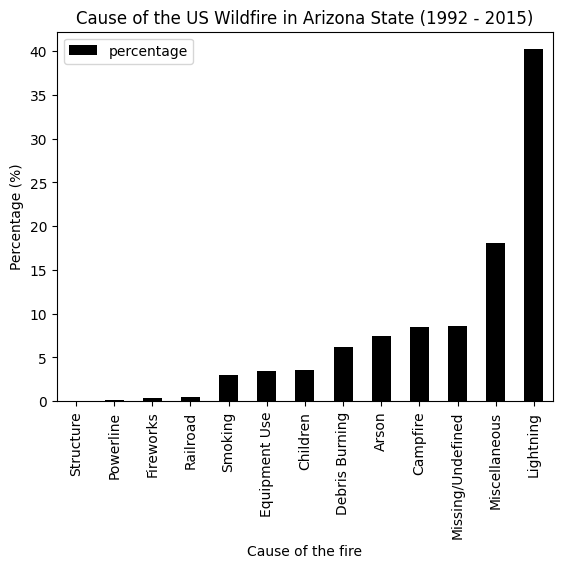

In [12]:
az = df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().filter(df_spark['STATE'] == 'AZ')
az_t = df_spark.groupBy('STATE').count().filter(df_spark['STATE'] == 'AZ')
az_total = az_t.select('count').collect()[0]['count']

az = az.withColumn('percentage', (col('count') / az_total * 100))
#ca.show()

az_pandas = az.toPandas()


az_pandas_ordered = az_pandas.sort_values(by='percentage')

az_pandas_ordered.plot(x='STAT_CAUSE_DESCR', y='percentage', kind='bar', color = 'black')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('Percentage (%)')
plt.title('Cause of the US Wildfire in Arizona State (1992 - 2015)')
#plt.savefig('plots/Cause_of_US_Wildfire_in_AK_1992_2015.png')
plt.show()

In [13]:
def plotter(df_spark, state, color):
    df_state = df_spark.groupBy('STATE', 'STAT_CAUSE_DESCR').count().filter(df_spark['STATE'] == state)
    df_state_t = df_spark.groupBy('STATE').count().filter(df_spark['STATE'] == state)
    df_state_total = df_state_t.select('count').collect()[0]['count']

    df_state = df_state.withColumn('percentage', (col('count') / df_state_total * 100))
    #ca.show()

    df_state_pandas = df_state.toPandas()


    df_state_pandas_ordered = df_state_pandas.sort_values(by='percentage')

    df_state_pandas_ordered.plot(x='STAT_CAUSE_DESCR', y='percentage', kind='bar', color = color) #, figsize=(10, 6)
    #plt.yscale('log')  # Set y-axis to logarithmic scale
#     plt.xticks(rotation=45)
#     plt.xticks(fontsize=8) 
    plt.xlabel('Cause of the fire')
    plt.ylabel('Percentage (%)')
    plt.title(f'Cause of the US Wildfire in {state} State (1992 - 2015)')
    plt.savefig(path + f'plots/Cause_of_US_Wildfire_in_{state}_1992_2015.png')
    #plt.show()

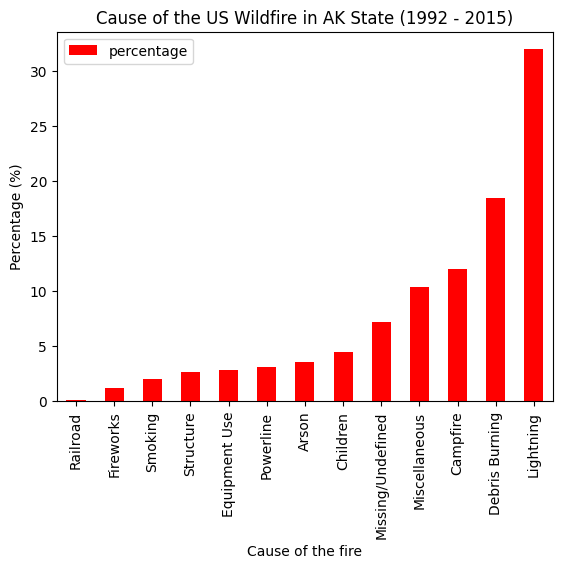

In [14]:
plotter(df_spark, state = 'AK', color = 'red')

In [137]:
ca_ordered = ca.toPandas().sort_values(by='count')
ca_ordered

,STATE,STAT_CAUSE_DESCR,count,percentage
4,CA,Structure,123,0.064891
0,CA,Fireworks,219,0.115537
12,CA,Railroad,720,0.379847
3,CA,Powerline,1198,0.632023
10,CA,Smoking,5936,3.131628
11,CA,Children,6930,3.656027
6,CA,Campfire,9516,5.020311
8,CA,Missing/Undefined,12605,6.649960
2,CA,Debris Burning,14318,7.553680
7,CA,Arson,19635,10.358744


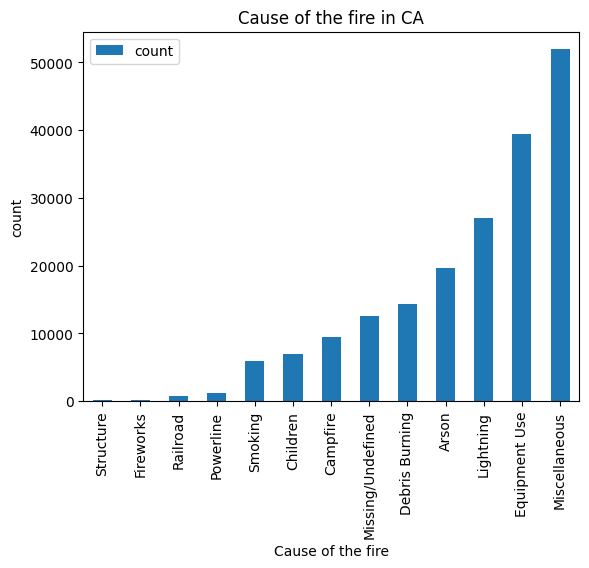

In [138]:
# Plot the histogram with log scale on y-axis
ca_ordered.plot(x='STAT_CAUSE_DESCR', y='count', kind='bar')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Cause of the fire')
plt.ylabel('count')
plt.title('Cause of the fire in CA')
plt.show()

In [155]:
df_spark.select('STATE').distinct().show()

+-----+
|STATE|
+-----+
|   AZ|
|   SC|
|   LA|
|   MN|
|   NJ|
|   DC|
|   OR|
|   VA|
|   RI|
|   WY|
|   KY|
|   NH|
|   MI|
|   NV|
|   WI|
|   ID|
|   CA|
|   NE|
|   CT|
|   MT|
+-----+
only showing top 20 rows



In [16]:
result_df = df_spark.groupBy('STATE').agg(F.avg('FIRE_SIZE')).toPandas()
result_df_ordered = result_df.sort_values(by='avg(FIRE_SIZE)')#, ascending=False)
result_df_ordered

,STATE,avg(FIRE_SIZE)
5,DC,0.4924242424242424242424
38,NY,1.1595396663286756522814
8,RI,1.1716875000000000000000
11,NH,1.5750436378466557911909
26,ME,1.8673490494296577946768
18,CT,2.2595076366559485530547
42,MA,2.3323419649657273419650
14,WI,2.7831915525878032704560
21,VT,3.4133464912280701754386
4,NJ,5.0854960114069906354773


In [17]:
 result_df_ordered['avg(FIRE_SIZE)']= pd.to_numeric(result_df_ordered['avg(FIRE_SIZE)'], errors='coerce')

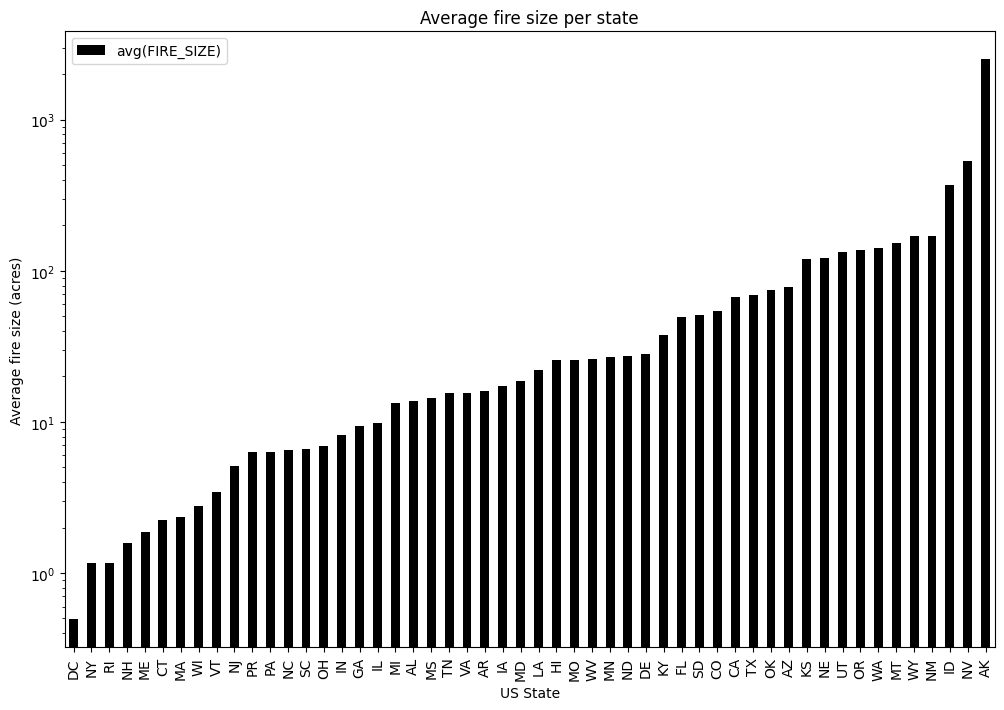

In [52]:
result_df_ordered.plot(x='STATE', y='avg(FIRE_SIZE)', kind='bar', color = 'black', figsize=(12, 8))
plt.yscale('log')
plt.xlabel('US State')
plt.ylabel('Average fire size (acres)')
plt.title('Average fire size per state')

#plt.savefig(path + 'plots/Average_fire_size_per_US_state.png')
plt.show()


In [13]:
df_res = df_spark.groupBy('STATE').agg(sum('FIRE_SIZE').alias('total fire size')).toPandas()
df_res ['total fire size'] = pd.to_numeric(df_res ['total fire size'], errors='coerce')
df_res_ordered = df_res.sort_values(by='total fire size')#, ascending=False)
df_res_ordered


,STATE,total fire size
5,DC,3.250000e+01
8,RI,5.624100e+02
21,VT,1.556486e+03
11,NH,3.862007e+03
23,DE,4.833650e+03
42,MA,6.124730e+03
18,CT,1.124331e+04
31,IN,1.732289e+04
25,IL,2.280751e+04
32,OH,2.393385e+04


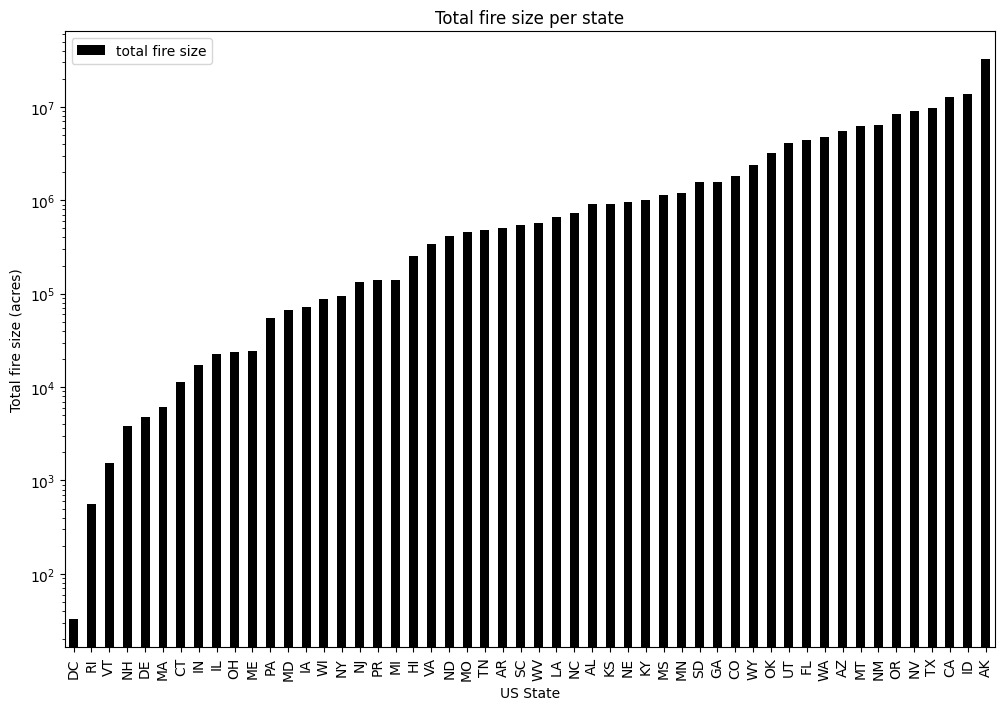

In [14]:
df_res_ordered.plot(x='STATE', y='total fire size', kind='bar', color = 'black', figsize=(12, 8))
plt.yscale('log')
plt.xlabel('US State')
plt.ylabel('Total fire size (acres)')
plt.title('Total fire size per state')

#plt.savefig(path + 'plots/Total_fire_size_per_US_state.png')
plt.show()


In [58]:
result_df = df_spark.groupBy('STATE', 'FIRE_SIZE_CLASS').count().toPandas()
ca = result_df[result_df['STATE'] == 'CA'].sort_values(by='count')#, ascending=False)
ca

,STATE,FIRE_SIZE_CLASS,count
239,CA,G,394
157,CA,F,756
68,CA,E,1187
8,CA,D,2137
319,CA,C,9825
256,CA,B,76942
139,CA,A,98309


In [10]:
def plotter_2 (df_spark, state):
    result_df = df_spark.groupBy('STATE', 'FIRE_SIZE_CLASS').count().toPandas()
    state_df = result_df[result_df['STATE'] == f'{state}'].sort_values(by='FIRE_SIZE_CLASS', ascending=True)
    state_df.plot(x='FIRE_SIZE_CLASS', y='count', kind='bar', color = 'red')#, figsize=(12, 8))
    plt.yscale('log')
    plt.xlabel(f'Fire size class')
    plt.ylabel('Count')
    #plt.ylim(0.1, 100000)
    plt.title(f'Number of fires per size class in {state}')

    plt.savefig(path + f'plots/Number_of_Fires_per_size_class_in_{state}.png')
    #plt.show()

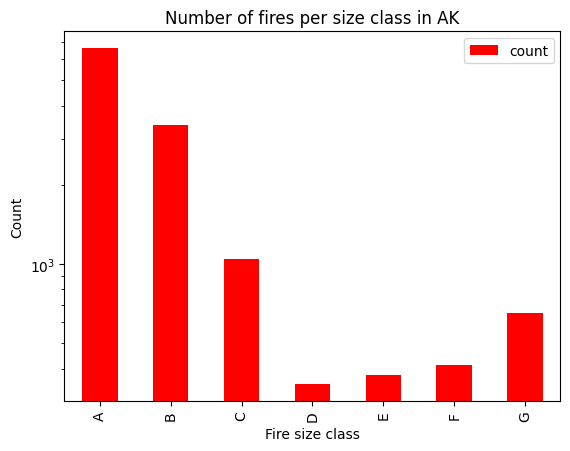

In [11]:
plotter_2 (df_spark, 'AK')

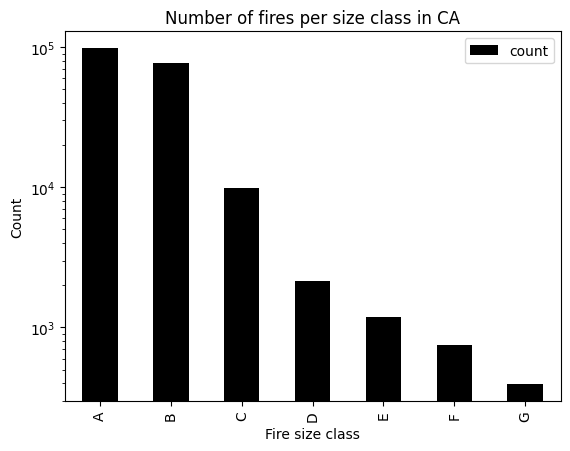

In [99]:
plotter_2 (df_spark, 'CA')

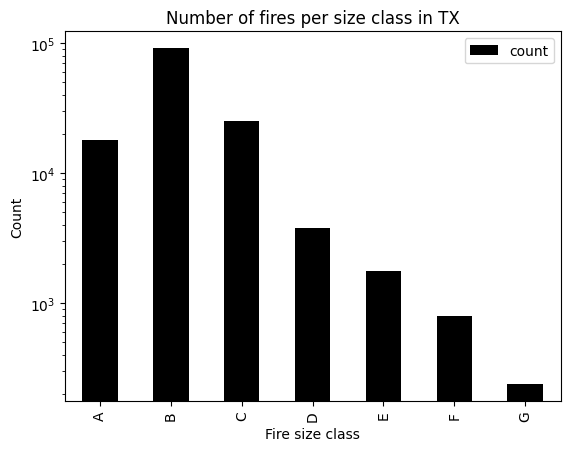

In [100]:
plotter_2 (df_spark, 'TX')

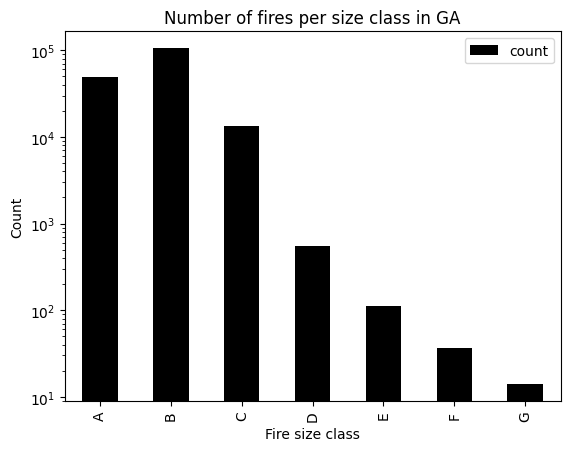

In [102]:
plotter_2 (df_spark, 'GA')

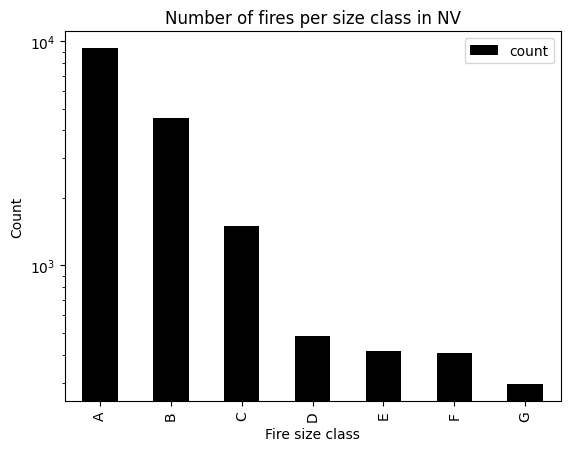

In [92]:
plotter_2 (df_spark, 'NV')

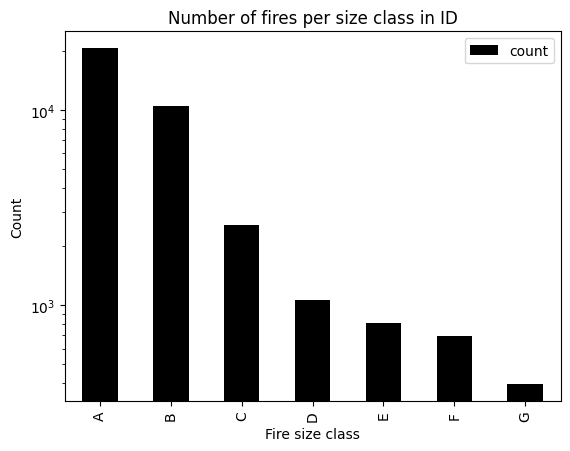

In [101]:
plotter_2 (df_spark, 'ID')

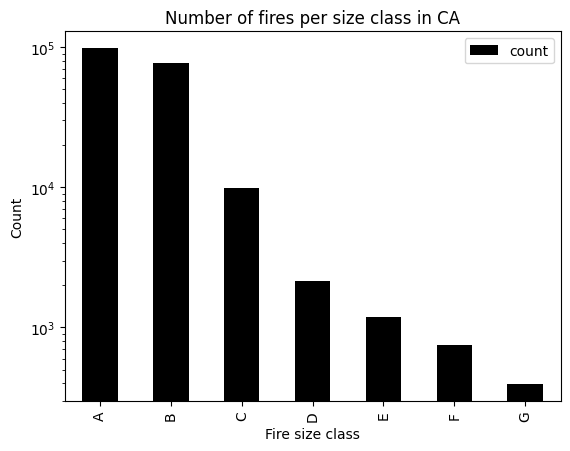

In [94]:
plotter_2 (df_spark, 'CA')

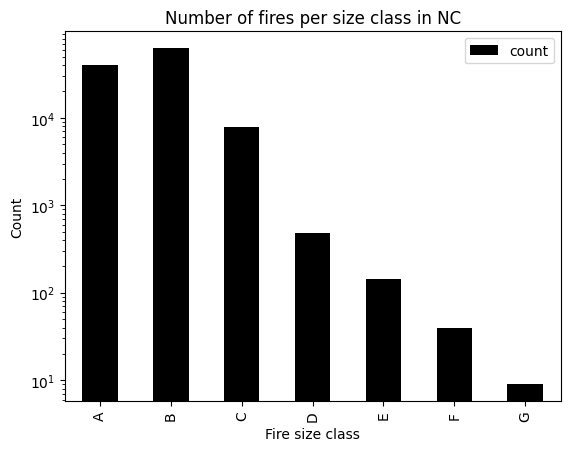

In [103]:
plotter_2 (df_spark, 'NC')

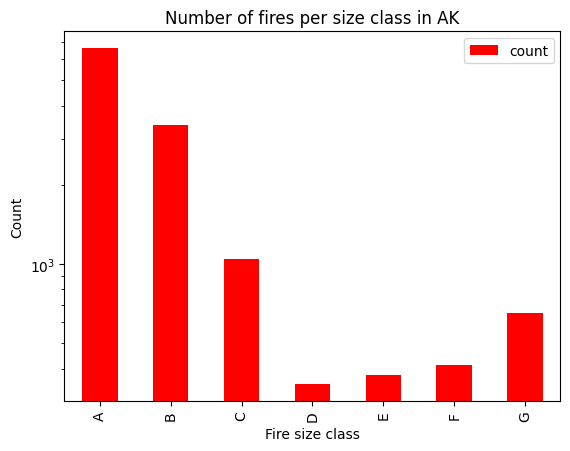

In [157]:
plotter_2 (df_spark, 'AK')

In [6]:
df_spark.select('COUNTY').distinct().show(n=1000)

+--------------------+
|              COUNTY|
+--------------------+
|           Petroleum|
|                Utah|
|      East Feliciana|
|           Worcester|
|              Aitkin|
|               Bucks|
|              Grimes|
|               Tyler|
|             Hanover|
|            Thurston|
|             HANCOCK|
|          CUMBERLAND|
|             JOHNSON|
|             lATIMER|
|               ADAIR|
|               OSAGE|
|Chattooga           |
|            OKANOGAN|
|       Unicoi County|
|                 125|
|          Deer Lodge|
|             Gilliam|
|               Izard|
|               Pasco|
|            Montcalm|
|          Charleston|
|            Angelina|
|           Oktibbeha|
|             Shannon|
|            REYNOLDS|
|               EMMET|
|            Island C|
|               ATOKA|
|Randolph            |
|              YAKIMA|
|LUCE             ...|
|            PONTOTOC|
|     Woodward County|
|              Hawaii|
|               Ferry|
|          

In [42]:
from pyspark.sql.functions import year, dayofmonth

In [44]:
df_spark.dtypes

[('OBJECTID', 'int'),
 ('FOD_ID', 'decimal(38,18)'),
 ('FPA_ID', 'string'),
 ('SOURCE_SYSTEM_TYPE', 'string'),
 ('SOURCE_SYSTEM', 'string'),
 ('NWCG_REPORTING_AGENCY', 'string'),
 ('NWCG_REPORTING_UNIT_ID', 'string'),
 ('NWCG_REPORTING_UNIT_NAME', 'string'),
 ('SOURCE_REPORTING_UNIT', 'string'),
 ('SOURCE_REPORTING_UNIT_NAME', 'string'),
 ('LOCAL_FIRE_REPORT_ID', 'string'),
 ('LOCAL_INCIDENT_ID', 'string'),
 ('FIRE_CODE', 'string'),
 ('FIRE_NAME', 'string'),
 ('ICS_209_INCIDENT_NUMBER', 'string'),
 ('ICS_209_NAME', 'string'),
 ('MTBS_ID', 'string'),
 ('MTBS_FIRE_NAME', 'string'),
 ('COMPLEX_NAME', 'string'),
 ('FIRE_YEAR', 'decimal(38,18)'),
 ('DISCOVERY_DATE', 'decimal(38,18)'),
 ('DISCOVERY_DOY', 'decimal(38,18)'),
 ('DISCOVERY_TIME', 'string'),
 ('STAT_CAUSE_CODE', 'decimal(38,18)'),
 ('STAT_CAUSE_DESCR', 'string'),
 ('CONT_DATE', 'decimal(38,18)'),
 ('CONT_DOY', 'decimal(38,18)'),
 ('CONT_TIME', 'string'),
 ('FIRE_SIZE', 'decimal(38,18)'),
 ('FIRE_SIZE_CLASS', 'string'),
 ('LATITUD

The date column for each fire will be built from the columns FIRE_YEAR and DISCOVERY_DOY

In [8]:
df_spark.select('FIRE_YEAR').show()

+--------------------+
|           FIRE_YEAR|
+--------------------+
|2005.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2005.000000000000...|
|2005.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
|2004.000000000000...|
+--------------------+
only showing top 20 rows



In [96]:
df.select("FIRE_YEAR").distinct().show()
df.select("DISCOVERY_DOY").distinct().show()


+---------+
|FIRE_YEAR|
+---------+
|     2003|
|     2007|
|     2015|
|     2006|
|     2013|
|     1997|
|     1994|
|     2014|
|     2004|
|     1996|
|     1998|
|     2012|
|     2009|
|     1995|
|     2001|
|     1992|
|     2005|
|     2000|
|     2010|
|     2011|
+---------+
only showing top 20 rows



+-------------+
|DISCOVERY_DOY|
+-------------+
|          148|
|          243|
|           31|
|          137|
|          251|
|           85|
|           65|
|          255|
|           53|
|          133|
|          296|
|           78|
|          322|
|          321|
|          362|
|          108|
|          155|
|          193|
|          211|
|           34|
+-------------+
only showing top 20 rows



In [100]:
df.columns

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape',
 'date']

In [126]:
df_spark.columns

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

In [7]:
df.select('date', 'FIRE_SIZE').show()

+----------+--------------------+
|      date|           FIRE_SIZE|
+----------+--------------------+
|2005-02-02|0.100000000000000000|
|2004-05-12|0.250000000000000000|
|2004-05-31|0.100000000000000000|
|2004-06-28|0.100000000000000000|
|2004-06-28|0.100000000000000000|
|2004-06-30|0.100000000000000000|
|2004-07-01|0.100000000000000000|
|2005-03-08|0.800000000000000000|
|2005-03-15|1.000000000000000000|
|2004-07-01|0.100000000000000000|
|2004-07-02|0.100000000000000000|
|2004-07-02|0.100000000000000000|
|2004-09-03|0.100000000000000000|
|2004-09-28|6.000000000000000000|
|2004-10-03|0.200000000000000000|
|2004-10-03|0.100000000000000000|
|2004-10-06|16823.00000000000...|
|2004-10-13|7700.000000000000...|
|2004-11-20|0.100000000000000000|
|2004-06-04|0.100000000000000000|
+----------+--------------------+
only showing top 20 rows



In [83]:
df.columns

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape',
 'date']

In [ ]:
pandas_df = df.select("year", "FIRE_SIZE").toPandas()
pandas_df['date'] = pd.to_datetime(pandas_df['date'])
pandas_df['year'] = pandas_df['date'].dt.year
pandas_df

In [90]:
pandas_df = df.select('date', 'FIRE_SIZE').toPandas()

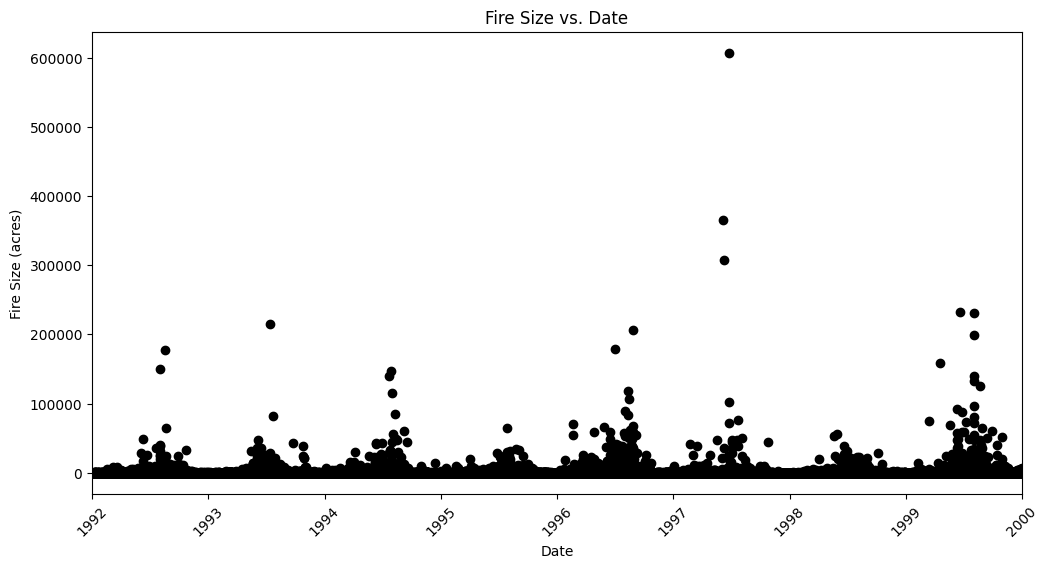

In [93]:
plt.figure(figsize=(12, 6))
plt.scatter(pandas_df["date"], pandas_df["FIRE_SIZE"], color = 'black')
plt.xlabel("Date")
plt.xlim(pd.to_datetime('1992-01-01'), pd.to_datetime('2000-01-01'))
plt.ylabel("Fire Size (acres)")
plt.title("Fire Size vs. Date")
plt.xticks(rotation=45)
#plt.savefig(path + 'plots/Fire_Size_vs_date_2008_2009.png')
plt.show()

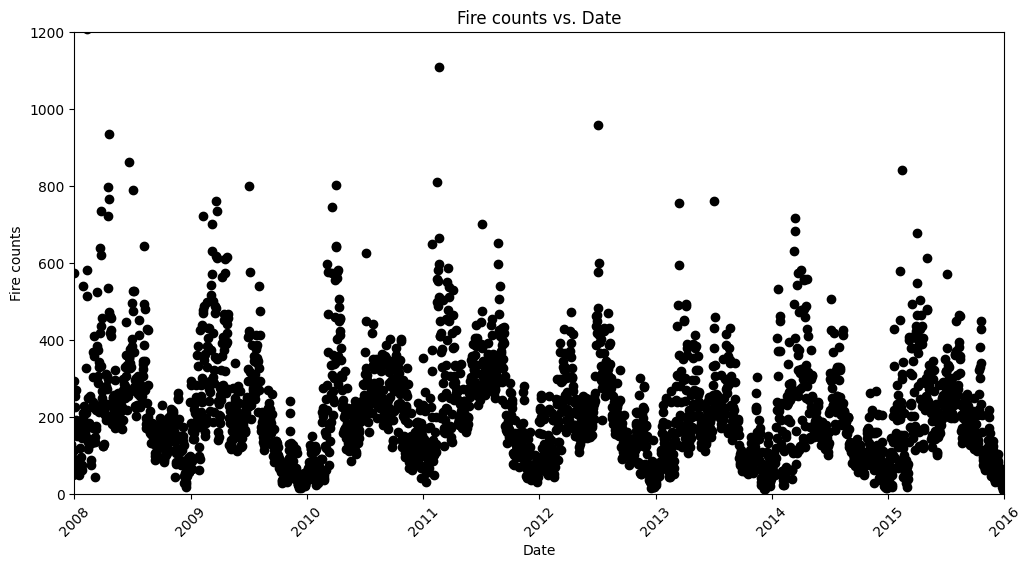

In [104]:
# pandas_df = df.groupBy('date').count().show()
pandas_df = df.groupBy('date').count().toPandas()

plt.figure(figsize=(12, 6))
plt.scatter(pandas_df["date"], pandas_df["count"], color = 'black')
plt.xlabel("Date")
plt.xlim(pd.to_datetime('2008-01-01'), pd.to_datetime('2016-01-01'))
plt.ylim(0, 1200)
plt.ylabel("Fire counts")
plt.title("Fire counts vs. Date")
plt.xticks(rotation=45)
#plt.savefig(path + 'plots/Fire_counts_vs_date_2008_2016.png')
plt.show()


In [88]:
df = df_spark

df = df.withColumn("FIRE_YEAR", df.FIRE_YEAR.cast("integer"))
df = df.withColumn("DISCOVERY_DOY", df.DISCOVERY_DOY.cast("integer"))

df = df.withColumn("date", to_date(
    concat(col("FIRE_YEAR"), lit("-"), col("DISCOVERY_DOY")),
    "yyyy-D"
))

#df.select('date', 'FIRE_YEAR', 'DISCOVERY_DOY').show()


In [158]:
df.select('FIRE_YEAR').show()

+---------+
|FIRE_YEAR|
+---------+
|     2005|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
|     2005|
|     2005|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
|     2004|
+---------+
only showing top 20 rows



In [234]:
def plotter_4(df, state, year):
    
    df_state = df.select('STATE', 'LONGITUDE', 'LATITUDE', 'FIRE_YEAR').filter(df['STATE'] == f'{state}')
    
    df_state_year = df_state.filter(df_state['FIRE_YEAR'] == f'{year}')

    # Select the latitude and longitude columns
    latitude_r = df_state.select('LATITUDE').rdd.flatMap(lambda x: x).collect()
    longitude_r = df_state.select('LONGITUDE').rdd.flatMap(lambda x: x).collect()

    # Set up the plot
    min_long, max_long = min(longitude_r), max(longitude_r)
    min_lat, max_lo = min(latitude_r), max(latitude_r)
    
    
    # Select the latitude and longitude columns
    latitude = df_state_year.select('LATITUDE').rdd.flatMap(lambda x: x).collect()
    longitude = df_state_year.select('LONGITUDE').rdd.flatMap(lambda x: x).collect()


    fig, ax = plt.subplots()#(figsize=(10, 10))
    ax.set_xlim(min_long, max_long )
    ax.set_ylim(min_lat, max_lo)

    # Add the basemap using contextily
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

    # Plot the scatter points
    ax.scatter(longitude, latitude, c='red', s=4)
    
    count = df.filter((df['FIRE_YEAR'] == f'{year}') & (df['STATE'] == f'{state}')).count()
    plt.title(f"Total {count} Wildfires in {state} state -- {year}")
    # Show the plot
    #plt.savefig(path + f'plots/Total_{count}_Wildfires_in_{state}_{year}.png')

    plt.show()

#     # Close the SparkSession
#     spark.stop()

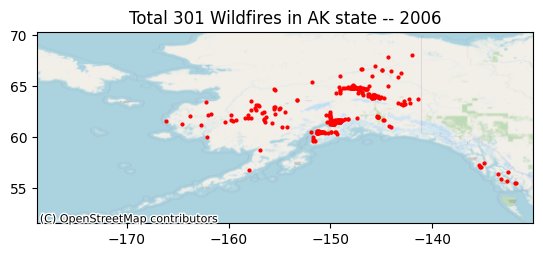

In [236]:
plotter_4(df, 'AK', 2006)

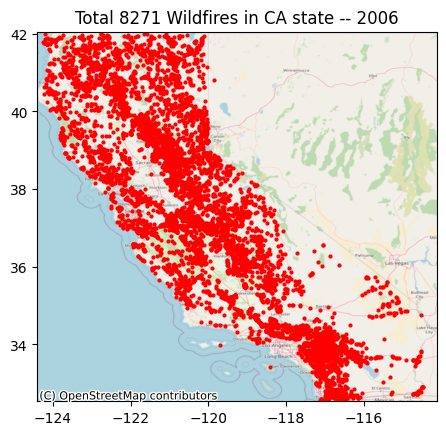

In [238]:
plotter_4(df, 'CA', 2006)

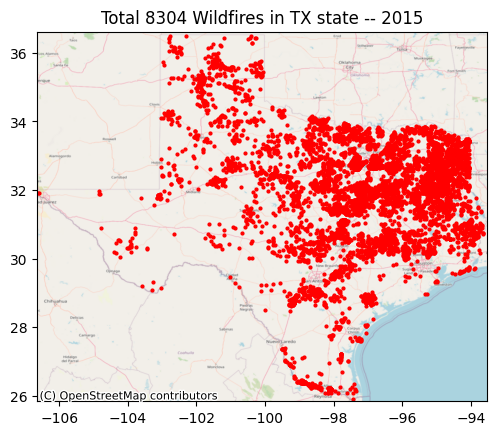

In [199]:
plotter_4(df, 'TX', 2015)

In [197]:
df.filter(df['FIRE_YEAR'] == 2006).filter(df['STATE'] == 'TX').count()

15022

In [188]:
df.filter((df['FIRE_YEAR'] == 2011 )& (df['STATE'] == 'TX')).count()

19453

In [163]:
df.select('STATE', 'date').filter(df['FIRE_YEAR'] == 1992).filter(df['STATE'] == 'TX').count()

1168

In [164]:
df.select('STATE', 'date').filter(df['FIRE_YEAR'] == 1992).filter(df['STATE'] == 'AK').count()

481

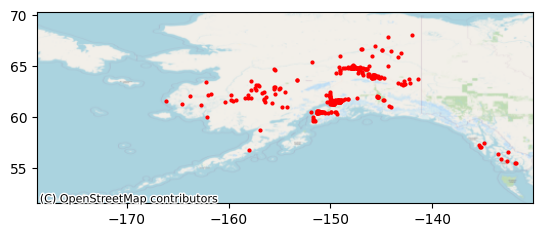

In [175]:
plotter_4(df, 'AK', 2006)

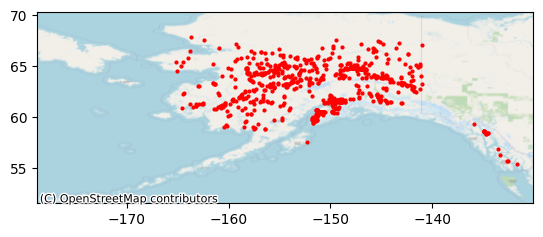

In [167]:
plotter_4(df, 'AK', 2015)

In [168]:
df.select('STATE', 'date').filter(df['FIRE_YEAR'] == 2015).filter(df['STATE'] == 'AK').count()

771

In [288]:
def plotter_5(df, year):
    
    df_year = df.filter(df['FIRE_YEAR'] == f'{year}')
    

    # Select the latitude and longitude columns
    latitude_r = df.select('LATITUDE').rdd.flatMap(lambda x: x).collect()
    longitude_r = df.select('LONGITUDE').rdd.flatMap(lambda x: x).collect()

    # Set up the plot
    min_long, max_long = min(longitude_r), max(longitude_r)
    min_lat, max_lo = min(latitude_r), max(latitude_r)
    
    
    # Select the latitude and longitude columns
    latitude = df_year.select('LATITUDE').rdd.flatMap(lambda x: x).collect()
    longitude = df_year.select('LONGITUDE').rdd.flatMap(lambda x: x).collect()


    fig, ax = plt.subplots()#(figsize=(10, 10))
    ax.set_xlim(min_long, max_long )
    ax.set_ylim(min_lat, max_lo)

    # Add the basemap using contextily
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

    # Plot the scatter points
    ax.scatter(longitude, latitude, c='red', s=1)
    
    count = df.filter((df['FIRE_YEAR'] == f'{year}')).count()
    plt.title(f"Total {count} Wildfires in US -- {year}")
    # Show the plot
    plt.savefig(path + f'plots/Total_{count}_Wildfires_in_US_{year}.png')

    #plt.show()

#     # Close the SparkSession
#     spark.stop()

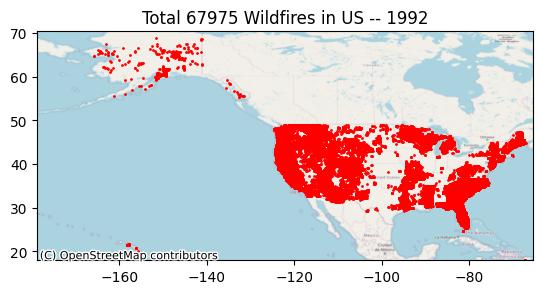

In [289]:
plotter_5(df, 1992)

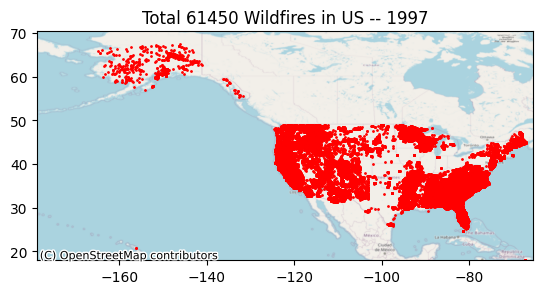

In [290]:
plotter_5(df, 1997)

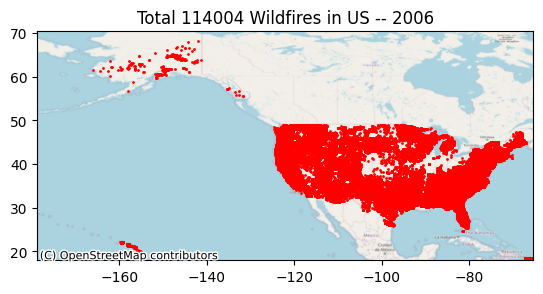

In [291]:
plotter_5(df, 2006)

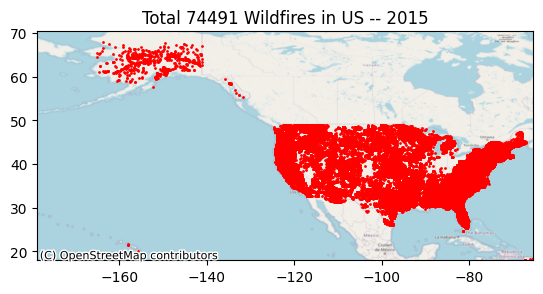

In [292]:
plotter_5(df, 2015)

In [246]:
df.groupBy('FIRE_YEAR').count().toPandas().sort_values('count')

,FIRE_YEAR,count
5,1997,61450
23,1993,61989
4,2013,64780
7,2014,67753
15,1992,67975
0,2003,68261
10,1998,68370
8,2004,69279
13,1995,71472
11,2012,72769


In [8]:
df_1992 = df.filter(df['date'] == '1992')
df_1992.select('date').show()

+----------+
|      date|
+----------+
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
|1992-01-01|
+----------+
only showing top 20 rows



In [9]:
df_1992.select('LONGITUDE').show()

+--------------------+
|           LONGITUDE|
+--------------------+
|-120.335000000000...|
|-83.1832000000000...|
|-101.018500000000...|
|-116.634200000000...|
|-80.9593200000000...|
|-74.5875000000000...|
|-94.5895800000000...|
|-93.9937500000000...|
|-97.3229100000000...|
|-89.7804302600000...|
|-89.5147312200000...|
|-89.6268494200000...|
|-90.1523054500000...|
|-89.2782381500000...|
|-89.1475426400000...|
|-90.5665258300000...|
|-90.8590084100000...|
|-90.2725714300000...|
|-90.1208134900000...|
|-90.5758752400000...|
+--------------------+
only showing top 20 rows



In [286]:
df.groupBy('FIRE_YEAR').count().toPandas().sort_values('count') 

,FIRE_YEAR,count
5,1997,61450
23,1993,61989
4,2013,64780
7,2014,67753
15,1992,67975
0,2003,68261
10,1998,68370
8,2004,69279
13,1995,71472
11,2012,72769


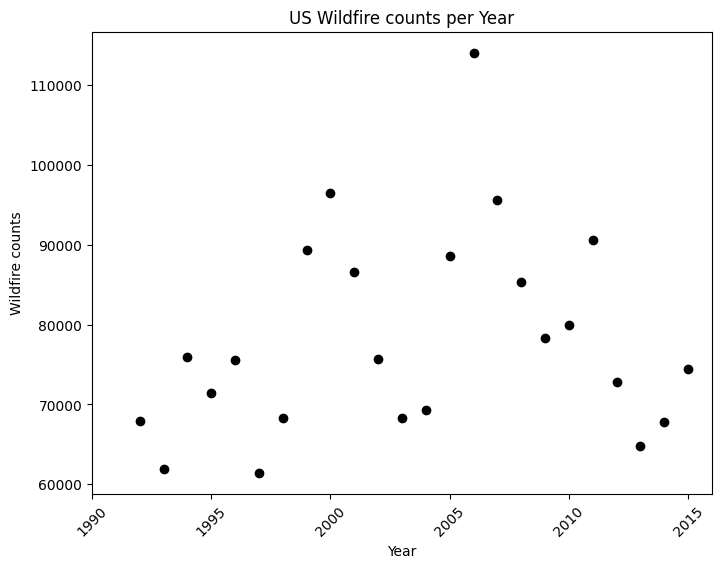

In [86]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.groupBy('FIRE_YEAR').count().toPandas()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pandas_df["FIRE_YEAR"], pandas_df["count"], color = 'black')
plt.xlim(1990, 2016)
plt.xlabel("Year")
plt.ylabel("Wildfire counts")
plt.title("US Wildfire counts per Year")
plt.xticks(rotation=45)
#plt.savefig(path + f'plots/US_Wildfire_counts_per_Year.png')
plt.show()


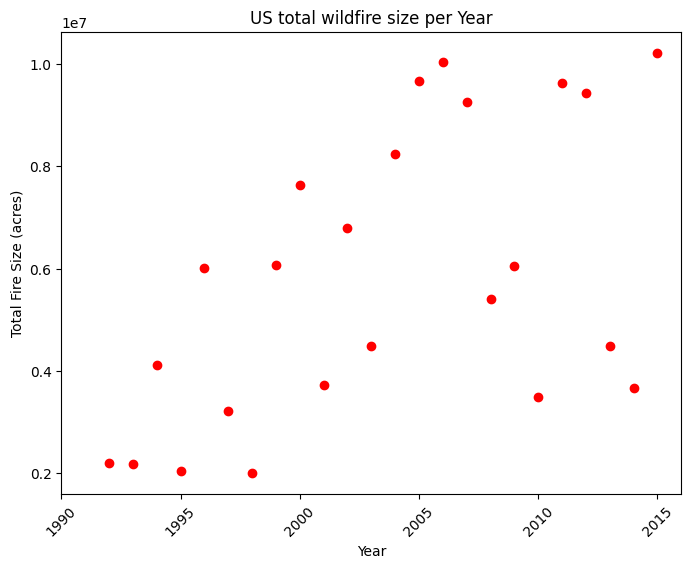

In [297]:
pandas_df = df.groupBy('FIRE_YEAR').agg(sum('FIRE_SIZE').alias('Total_Fire_Size')).toPandas()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pandas_df["FIRE_YEAR"], pandas_df["Total_Fire_Size"], color = 'red')
plt.xlim(1990, 2016)
plt.xlabel("Year")
plt.ylabel("Total Fire Size (acres)")
plt.title("US total wildfire size per Year")
plt.xticks(rotation=45)
plt.savefig(path + f'plots/US_total_Wildfire_size_per_Year.png')
#plt.show()

In [49]:
df.select('FIRE_SIZE').show()

+--------------------+
|           FIRE_SIZE|
+--------------------+
|0.100000000000000000|
|0.250000000000000000|
|0.100000000000000000|
|0.100000000000000000|
|0.100000000000000000|
|0.100000000000000000|
|0.100000000000000000|
|0.800000000000000000|
|1.000000000000000000|
|0.100000000000000000|
|0.100000000000000000|
|0.100000000000000000|
|0.100000000000000000|
|6.000000000000000000|
|0.200000000000000000|
|0.100000000000000000|
|16823.00000000000...|
|7700.000000000000...|
|0.100000000000000000|
|0.100000000000000000|
+--------------------+
only showing top 20 rows



In [62]:
df.groupBy('FIRE_YEAR').agg(sum('FIRE_SIZE').alias('Total_Fire_Size')).show()

+--------------------+--------------------+
|           FIRE_YEAR|     Total_Fire_Size|
+--------------------+--------------------+
|2003.000000000000...|4483572.945760000...|
|1997.000000000000...|3214635.310000000...|
|2006.000000000000...|10043497.91155000...|
|2004.000000000000...|8234208.174139999...|
|1995.000000000000...|2049585.058000000...|
|2014.000000000000...|3673490.392712000...|
|2007.000000000000...|9265428.728150000...|
|2015.000000000000...|10218267.61780000...|
|1992.000000000000...|2199958.001000000...|
|1998.000000000000...|2011102.400010000...|
|2000.000000000000...|7639498.644000000...|
|1996.000000000000...|6005155.709000000...|
|1999.000000000000...|6080199.715290000...|
|2012.000000000000...|9439888.452000000...|
|2013.000000000000...|4492502.414910000...|
|2009.000000000000...|6057166.106714000...|
|2010.000000000000...|3493455.215690000...|
|2005.000000000000...|9665105.128020000...|
|2001.000000000000...|3724072.304000000...|
|2011.000000000000...|9623597.28

In [55]:
df.dtypes

[('OBJECTID', 'int'),
 ('FOD_ID', 'decimal(38,18)'),
 ('FPA_ID', 'string'),
 ('SOURCE_SYSTEM_TYPE', 'string'),
 ('SOURCE_SYSTEM', 'string'),
 ('NWCG_REPORTING_AGENCY', 'string'),
 ('NWCG_REPORTING_UNIT_ID', 'string'),
 ('NWCG_REPORTING_UNIT_NAME', 'string'),
 ('SOURCE_REPORTING_UNIT', 'string'),
 ('SOURCE_REPORTING_UNIT_NAME', 'string'),
 ('LOCAL_FIRE_REPORT_ID', 'string'),
 ('LOCAL_INCIDENT_ID', 'string'),
 ('FIRE_CODE', 'string'),
 ('FIRE_NAME', 'string'),
 ('ICS_209_INCIDENT_NUMBER', 'string'),
 ('ICS_209_NAME', 'string'),
 ('MTBS_ID', 'string'),
 ('MTBS_FIRE_NAME', 'string'),
 ('COMPLEX_NAME', 'string'),
 ('FIRE_YEAR', 'decimal(38,18)'),
 ('DISCOVERY_DATE', 'decimal(38,18)'),
 ('DISCOVERY_DOY', 'decimal(38,18)'),
 ('DISCOVERY_TIME', 'string'),
 ('STAT_CAUSE_CODE', 'decimal(38,18)'),
 ('STAT_CAUSE_DESCR', 'string'),
 ('CONT_DATE', 'decimal(38,18)'),
 ('CONT_DOY', 'decimal(38,18)'),
 ('CONT_TIME', 'string'),
 ('FIRE_SIZE', 'decimal(38,18)'),
 ('FIRE_SIZE_CLASS', 'string'),
 ('LATITUD

In [68]:
df.select('date').show()

+----------+
|      date|
+----------+
|2005-02-02|
|2004-05-12|
|2004-05-31|
|2004-06-28|
|2004-06-28|
|2004-06-30|
|2004-07-01|
|2005-03-08|
|2005-03-15|
|2004-07-01|
|2004-07-02|
|2004-07-02|
|2004-09-03|
|2004-09-28|
|2004-10-03|
|2004-10-03|
|2004-10-06|
|2004-10-13|
|2004-11-20|
|2004-06-04|
+----------+
only showing top 20 rows



In [260]:
df = df.withColumn('month', month('date'))

df.select('date', 'month').show()

+----------+-----+
|      date|month|
+----------+-----+
|2005-02-02|    2|
|2004-05-12|    5|
|2004-05-31|    5|
|2004-06-28|    6|
|2004-06-28|    6|
|2004-06-30|    6|
|2004-07-01|    7|
|2005-03-08|    3|
|2005-03-15|    3|
|2004-07-01|    7|
|2004-07-02|    7|
|2004-07-02|    7|
|2004-09-03|    9|
|2004-09-28|    9|
|2004-10-03|   10|
|2004-10-03|   10|
|2004-10-06|   10|
|2004-10-13|   10|
|2004-11-20|   11|
|2004-06-04|    6|
+----------+-----+
only showing top 20 rows



In [261]:
df.groupBy('month').agg(sum('FIRE_SIZE')).show()

+-----+--------------------+
|month|      sum(FIRE_SIZE)|
+-----+--------------------+
|   12|895203.0188899999...|
|    1|1897184.349540000...|
|    6|34718448.38682000...|
|    3|6811492.281408000...|
|    5|9881825.104810000...|
|    9|6056129.581580000...|
|    4|8382925.004946000...|
|    8|28726823.20133900...|
|    7|33198928.42982000...|
|   10|3882545.425910000...|
|   11|2090597.425845000...|
|    2|3590447.341777000...|
+-----+--------------------+



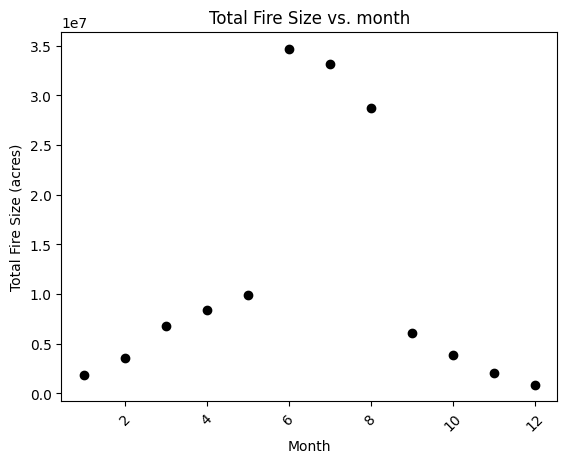

In [57]:

pandas_df = df.groupBy('month').agg(sum('FIRE_SIZE').alias('Total_Fire_Size_per_month')).toPandas()

# Plotting
plt.scatter(pandas_df["month"], pandas_df["Total_Fire_Size_per_month"], color = 'black')
plt.xlabel("Month")
plt.ylabel("Total Fire Size (acres)")
plt.title("Total Fire Size vs. month")
plt.xticks(rotation=45)
plt.savefig(path + 'plots/Total_Fire_Size_vs_month.png')
#plt.show()


In [151]:
def plotter_3(state):
    
    df_state = df.groupBy('month', 'STATE').agg(sum('FIRE_SIZE')).filter(df['STATE']==state).toPandas()

    # Plotting
    plt.scatter(df_state["month"], df_state["sum(FIRE_SIZE)"], color = 'black')
    plt.xlabel("Month")
    plt.ylabel("Total Fire Size (acres)")
    plt.title(f"Total Fire Size vs. month for {state} state (1992 - 2015)")
    plt.xticks(rotation=45)
    plt.savefig(path + f'plots/Total_Fire_Size_vs_month_in_{state}.png')
    #plt.show()

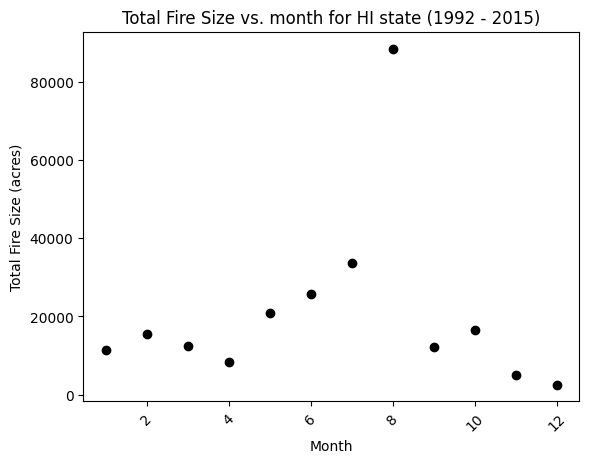

In [156]:
plotter_3('HI')

In [79]:
df.groupBy('month', 'STATE').agg(sum('FIRE_SIZE')).filter(df['STATE']=='CA').show()

+-----+-----+--------------------+
|month|STATE|      sum(FIRE_SIZE)|
+-----+-----+--------------------+
|   10|   CA|1925815.090000000...|
|    2|   CA|50755.99000000000...|
|    1|   CA|28151.58000000000...|
|    6|   CA|1942791.961000000...|
|    8|   CA|3464813.421000000...|
|    4|   CA|119146.4200000000...|
|    7|   CA|3033949.440000000...|
|   11|   CA|105523.6200000000...|
|    3|   CA|31193.13000000000...|
|    5|   CA|468202.2700000000...|
|    9|   CA|1523875.710000000...|
|   12|   CA|51639.94000000000...|
+-----+-----+--------------------+



In [86]:
df.select('STATE').distinct().show(n=100)

+-----+
|STATE|
+-----+
|   AZ|
|   SC|
|   LA|
|   MN|
|   NJ|
|   DC|
|   OR|
|   VA|
|   RI|
|   WY|
|   KY|
|   NH|
|   MI|
|   NV|
|   WI|
|   ID|
|   CA|
|   NE|
|   CT|
|   MT|
|   NC|
|   VT|
|   MD|
|   DE|
|   MO|
|   IL|
|   ME|
|   WA|
|   ND|
|   MS|
|   AL|
|   IN|
|   OH|
|   TN|
|   NM|
|   IA|
|   PA|
|   SD|
|   NY|
|   TX|
|   WV|
|   GA|
|   MA|
|   KS|
|   CO|
|   FL|
|   AK|
|   AR|
|   OK|
|   PR|
|   UT|
|   HI|
+-----+



In [92]:
df.columns

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape',
 'date',
 'month']

In [110]:

df.groupBy('STATE').agg(sum('FIRE_SIZE').alias('Total fire size')).orderBy(desc('Total fire size')).show(n=100)


+-----+--------------------+
|STATE|     Total fire size|
+-----+--------------------+
|   AK|32233094.24220000...|
|   ID|13684334.92100000...|
|   CA|12745858.57200000...|
|   TX|9786218.309980000...|
|   NV|9015855.340000000...|
|   OR|8412801.370000000...|
|   NM|6380041.761010000...|
|   MT|6279526.120180000...|
|   AZ|5576680.933990000...|
|   WA|4782218.310000000...|
|   FL|4436748.159850000...|
|   UT|4114926.359010000...|
|   OK|3232490.310000000...|
|   WY|2401470.684200000...|
|   CO|1842309.090000000...|
|   GA|1589959.180060000...|
|   SD|1570865.600320000...|
|   MN|1210605.420010000...|
|   MS|1135483.800000000...|
|   KY|1014890.784996000...|
|   NE|967398.7579000000...|
|   KS|922613.8010000000...|
|   AL|920545.2550000000...|
|   NC|730521.4600100000...|
|   LA|661023.9129770000...|
|   WV|576631.0500000000...|
|   SC|541666.1449800000...|
|   AR|508911.8300100000...|
|   TN|486652.4000100000...|
|   MO|459525.7410000000...|
|   ND|412607.2300000000...|
|   VA|341645.

In [30]:
from pyspark.sql.functions import desc

df_spark.groupBy('FIRE_SIZE_CLASS').count().orderBy(desc('count')).show()

+---------------+------+
|FIRE_SIZE_CLASS| count|
+---------------+------+
|              B|939376|
|              A|666919|
|              C|220077|
|              D| 28427|
|              E| 14107|
|              F|  7786|
|              G|  3773|
+---------------+------+



In [31]:
df_spark.select('FIRE_SIZE_CLASS').toPandas().value_counts(normalize=True)*100

FIRE_SIZE_CLASS
B                  49.954453
A                  35.465643
C                  11.703329
D                   1.511701
E                   0.750187
F                   0.414047
G                   0.200642
Name: proportion, dtype: float64

In [53]:
df_spark = df_spark.withColumn('STAT_CAUSE_CODE', df_spark.STAT_CAUSE_CODE.cast('double'))


In [42]:
df_spark.groupBy('STAT_CAUSE_CODE').count().orderBy(desc('count')).show()

+---------------+------+
|STAT_CAUSE_CODE| count|
+---------------+------+
|            5.0|429028|
|            9.0|323805|
|            7.0|281455|
|            1.0|278468|
|           13.0|166723|
|            2.0|147612|
|            4.0| 76139|
|            8.0| 61167|
|            3.0| 52869|
|            6.0| 33455|
|           11.0| 14448|
|           10.0| 11500|
|           12.0|  3796|
+---------------+------+



In [39]:
df_spark.select('STAT_CAUSE_CODE').toPandas().value_counts(normalize = True)*100

STAT_CAUSE_CODE
5.0                22.814995
9.0                17.219411
7.0                14.967309
1.0                14.808465
13.0                8.866052
2.0                 7.849761
4.0                 4.048945
8.0                 3.252759
3.0                 2.811485
6.0                 1.779081
11.0                0.768321
10.0                0.611551
12.0                0.201865
Name: proportion, dtype: float64

In [7]:
df_spark.select('CONT_DOY').filter(df_spark['CONT_DOY'].isNull()).count()


891531

In [8]:
df.select('CONT_DOY').filter(df['CONT_DOY'].isNull()).count()


891531

In [324]:
df_spark.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- FOD_ID: decimal(38,18) (nullable = true)
 |-- FPA_ID: string (nullable = true)
 |-- SOURCE_SYSTEM_TYPE: string (nullable = true)
 |-- SOURCE_SYSTEM: string (nullable = true)
 |-- NWCG_REPORTING_AGENCY: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_ID: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_NAME: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT_NAME: string (nullable = true)
 |-- LOCAL_FIRE_REPORT_ID: string (nullable = true)
 |-- LOCAL_INCIDENT_ID: string (nullable = true)
 |-- FIRE_CODE: string (nullable = true)
 |-- FIRE_NAME: string (nullable = true)
 |-- ICS_209_INCIDENT_NUMBER: string (nullable = true)
 |-- ICS_209_NAME: string (nullable = true)
 |-- MTBS_ID: string (nullable = true)
 |-- MTBS_FIRE_NAME: string (nullable = true)
 |-- COMPLEX_NAME: string (nullable = true)
 |-- FIRE_YEAR: decimal(38,18) (nullable = true)
 |-- DISCOVERY_DATE: decimal(38,18) (null

In [22]:
from pyspark.sql.functions import col, when

df = df_spark

df = df.withColumn("FIRE_YEAR", df.FIRE_YEAR.cast("integer"))
df = df.withColumn("DISCOVERY_DOY", df.DISCOVERY_DOY.cast("integer"))
df = df.withColumn("CONT_DOY", col("CONT_DOY").cast("int"))
df = df.withColumn("STAT_CAUSE_CODE", df.STAT_CAUSE_CODE.cast("integer"))
df = df.withColumn("FIRE_SIZE", df.FIRE_SIZE.cast("integer"))

# my_df = my_df.withColumn("DISCOVERY_DOY", col("DISCOVERY_DOY").cast("int"))
# my_df = my_df.withColumn("CONT_DOY", col("CONT_DOY").cast("int"))


df = df.withColumn("date", to_date(
    concat(col("FIRE_YEAR"), lit("-"), col("DISCOVERY_DOY")),
    "yyyy-D"
))



df = df.withColumn('month', month('date'))


# in some cases the cont_doy is in next year and so the firing_time gets negative and so I do the following:
df = df.withColumn("CONT_DOY", when(col("CONT_DOY") < col("DISCOVERY_DOY"), col("CONT_DOY") + 365).otherwise(col("CONT_DOY")))


In [24]:
my_df = df.select('STATE', 'FIRE_YEAR', 'FIRE_SIZE','FIRE_SIZE_CLASS', 'STAT_CAUSE_CODE',\
                  'CONT_DOY', 'DISCOVERY_DOY', 'month', 'date')
my_df.count()

1880465

In [25]:
my_df.printSchema()

root
 |-- STATE: string (nullable = true)
 |-- FIRE_YEAR: integer (nullable = true)
 |-- FIRE_SIZE: integer (nullable = true)
 |-- FIRE_SIZE_CLASS: string (nullable = true)
 |-- STAT_CAUSE_CODE: integer (nullable = true)
 |-- CONT_DOY: integer (nullable = true)
 |-- DISCOVERY_DOY: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- date: date (nullable = true)



In [26]:
my_df.count()

1880465

In [35]:
df_spark.select('CONT_DOY').filter(df_spark['CONT_DOY'].isNull()).count()

891531

In [252]:
988934 + 891531

1880465

In [27]:
my_df = my_df.dropna()

In [29]:
my_df.count()

988934

In [28]:
my_df.show()

+-----+---------+---------+---------------+---------------+--------+-------------+-----+----------+
|STATE|FIRE_YEAR|FIRE_SIZE|FIRE_SIZE_CLASS|STAT_CAUSE_CODE|CONT_DOY|DISCOVERY_DOY|month|      date|
+-----+---------+---------+---------------+---------------+--------+-------------+-----+----------+
|   CA|     2005|        0|              A|              9|      33|           33|    2|2005-02-02|
|   CA|     2004|        0|              A|              1|     133|          133|    5|2004-05-12|
|   CA|     2004|        0|              A|              5|     152|          152|    5|2004-05-31|
|   CA|     2004|        0|              A|              1|     185|          180|    6|2004-06-28|
|   CA|     2004|        0|              A|              1|     185|          180|    6|2004-06-28|
|   CA|     2004|        0|              A|              1|     183|          182|    6|2004-06-30|
|   CA|     2004|        0|              A|              1|     184|          183|    7|2004-07-01|


In [30]:
my_df.columns

['STATE',
 'FIRE_YEAR',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'STAT_CAUSE_CODE',
 'CONT_DOY',
 'DISCOVERY_DOY',
 'month',
 'date']

In [31]:
my_df.describe().show()


+-------+------+------------------+------------------+---------------+-----------------+------------------+------------------+------------------+
|summary| STATE|         FIRE_YEAR|         FIRE_SIZE|FIRE_SIZE_CLASS|  STAT_CAUSE_CODE|          CONT_DOY|     DISCOVERY_DOY|             month|
+-------+------+------------------+------------------+---------------+-----------------+------------------+------------------+------------------+
|  count|988934|            988934|            988934|         988934|           988934|            988934|            988934|            988934|
|   mean|  null|2004.1645135064625|119.10465207991635|           null|5.562857582002439|172.70954482301144|171.56672437189943| 6.153712987924371|
| stddev|  null| 7.355630988506416| 3374.638517470414|           null|3.589810255823142| 84.35388247395116| 83.77873997254822|2.7556513405832117|
|    min|    AK|              1992|                 0|              A|                1|                 1|                 

In [306]:
my_df.filter(my_df['STATE']== 'TX').describe().show()


+-------+-----+------------------+------------------+-----------------+-------------------+
|summary|STATE|          CONT_DOY|     DISCOVERY_DOY|            month|        Firing_time|
+-------+-----+------------------+------------------+-----------------+-------------------+
|  count|14171|             14171|             14171|            14171|              14171|
|   mean| null|170.00204643285582|170.05207818784842|6.110013407663538|-0.0500317549925905|
| stddev| null| 93.64958972497719| 93.73736925172449|3.076184948750139| 14.559326780245758|
|    min|   TX|                 1|                 1|                1|               -365|
|    max|   TX|               366|               366|               12|                178|
+-------+-----+------------------+------------------+-----------------+-------------------+



In [323]:
df_spark.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- FOD_ID: decimal(38,18) (nullable = true)
 |-- FPA_ID: string (nullable = true)
 |-- SOURCE_SYSTEM_TYPE: string (nullable = true)
 |-- SOURCE_SYSTEM: string (nullable = true)
 |-- NWCG_REPORTING_AGENCY: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_ID: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_NAME: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT_NAME: string (nullable = true)
 |-- LOCAL_FIRE_REPORT_ID: string (nullable = true)
 |-- LOCAL_INCIDENT_ID: string (nullable = true)
 |-- FIRE_CODE: string (nullable = true)
 |-- FIRE_NAME: string (nullable = true)
 |-- ICS_209_INCIDENT_NUMBER: string (nullable = true)
 |-- ICS_209_NAME: string (nullable = true)
 |-- MTBS_ID: string (nullable = true)
 |-- MTBS_FIRE_NAME: string (nullable = true)
 |-- COMPLEX_NAME: string (nullable = true)
 |-- FIRE_YEAR: decimal(38,18) (nullable = true)
 |-- DISCOVERY_DATE: decimal(38,18) (null

In [353]:
my_df.filter(my_df.Firing_time < 0).show(n=150)

+-----+--------+-------------+-----+----+-----------+
|STATE|CONT_DOY|DISCOVERY_DOY|month|date|Firing_time|
+-----+--------+-------------+-----+----+-----------+
+-----+--------+-------------+-----+----+-----------+



In [340]:
41+365 - 195 + 154

365

In [32]:
my_df = my_df.withColumn('Firing_time', col('CONT_DOY') - col('DISCOVERY_DOY'))
my_df.select('Firing_time', 'CONT_DOY', 'DISCOVERY_DOY').show()

+-----------+--------+-------------+
|Firing_time|CONT_DOY|DISCOVERY_DOY|
+-----------+--------+-------------+
|          0|      33|           33|
|          0|     133|          133|
|          0|     152|          152|
|          5|     185|          180|
|          5|     185|          180|
|          1|     183|          182|
|          1|     184|          183|
|          0|      67|           67|
|          0|      74|           74|
|          1|     184|          183|
|          1|     185|          184|
|          1|     185|          184|
|          0|     247|          247|
|          0|     272|          272|
|          0|     277|          277|
|          0|     277|          277|
|         15|     295|          280|
|          4|     291|          287|
|          1|     326|          325|
|          0|     156|          156|
+-----------+--------+-------------+
only showing top 20 rows



In [33]:
my_df.groupBy('STATE').agg(sum('Firing_time').alias('Firing_time_per_state')).show(n = 100)


+-----+---------------------+
|STATE|Firing_time_per_state|
+-----+---------------------+
|   AZ|                70943|
|   SC|                 3041|
|   LA|                 1388|
|   MN|                 3977|
|   NJ|                19461|
|   DC|                    1|
|   OR|                78599|
|   VA|                 3325|
|   RI|                   40|
|   WY|                27595|
|   KY|                 6443|
|   NH|                   78|
|   MI|                 3982|
|   NV|                17962|
|   WI|                  998|
|   ID|               141300|
|   CA|                74858|
|   NE|                  962|
|   CT|                   13|
|   MT|                75124|
|   NC|                 3311|
|   VT|                   21|
|   MD|                  425|
|   DE|                   14|
|   MO|                 1275|
|   IL|                  533|
|   ME|                 1565|
|   WA|               108314|
|   ND|                 3792|
|   MS|                 3991|
|   AL|   

In [44]:
my_df.groupBy('STATE').agg(sum('Firing_time')).show()

+-----+----------------+
|STATE|sum(Firing_time)|
+-----+----------------+
|   AZ|           70943|
|   SC|            3041|
|   LA|            1388|
|   MN|            3977|
|   NJ|           19461|
|   DC|               1|
|   OR|           78599|
|   VA|            3325|
|   RI|              40|
|   WY|           27595|
|   KY|            6443|
|   NH|              78|
|   MI|            3982|
|   NV|           17962|
|   WI|             998|
|   ID|          141300|
|   CA|           74858|
|   NE|             962|
|   CT|              13|
|   MT|           75124|
+-----+----------------+
only showing top 20 rows



In [43]:
my_df.groupBy('STATE').count().show()#select('Firing_time').show()

+-----+-----+
|STATE|count|
+-----+-----+
|   AZ|66355|
|   SC|34330|
|   LA| 3284|
|   MN|19336|
|   NJ| 3821|
|   DC|   65|
|   OR|60751|
|   VA| 3912|
|   RI|  366|
|   WY|12406|
|   KY|13117|
|   NH|  387|
|   MI| 7975|
|   NV|16875|
|   WI|14896|
|   ID|30662|
|   CA|91908|
|   NE| 5231|
|   CT| 1229|
|   MT|36952|
+-----+-----+
only showing top 20 rows



In [45]:
70943/66355 

1.0691432446688267

In [41]:
my_df.groupBy('STATE').agg(F.avg('Firing_time').alias('Firing_time_per_state')).show(n = 100)


+-----+---------------------+
|STATE|Firing_time_per_state|
+-----+---------------------+
|   AZ|   1.0691432446688267|
|   SC|  0.08858141567142441|
|   LA|   0.4226552984165652|
|   MN|  0.20567852709971038|
|   NJ|   5.0931693274012035|
|   DC| 0.015384615384615385|
|   OR|    1.293789402643578|
|   VA|   0.8499488752556237|
|   RI|   0.1092896174863388|
|   WY|   2.2243269385781073|
|   KY|   0.4911946329191126|
|   NH|  0.20155038759689922|
|   MI|   0.4993103448275862|
|   NV|    1.064414814814815|
|   WI|  0.06699785177228786|
|   ID|    4.608309960211336|
|   CA|   0.8144884014449232|
|   NE|  0.18390365130950106|
|   CT| 0.010577705451586655|
|   MT|    2.033015804286642|
|   NC|  0.12708709169769317|
|   VT|  0.08076923076923077|
|   MD|  0.45454545454545453|
|   DE|  0.21212121212121213|
|   MO|  0.18371757925072046|
|   IL|  0.30198300283286117|
|   ME|  0.14937482103655628|
|   WA|    5.070168047558863|
|   ND|   0.2666479150552001|
|   MS|  0.09411625987501474|
|   AL|  0

In [38]:
my_df.groupBy('STATE').agg(sum('Firing_time').alias('Firing_time_per_state')).orderBy(desc('Firing_time_per_state')).show()


+-----+---------------------+
|STATE|Firing_time_per_state|
+-----+---------------------+
|   NY|               189685|
|   ID|               141300|
|   WA|               108314|
|   AK|                94712|
|   OR|                78599|
|   MT|                75124|
|   CA|                74858|
|   AZ|                70943|
|   NM|                52216|
|   UT|                40846|
|   CO|                37497|
|   WY|                27595|
|   NJ|                19461|
|   FL|                18918|
|   NV|                17962|
|   OK|                 8973|
|   TX|                 7686|
|   KY|                 6443|
|   GA|                 5806|
|   TN|                 4044|
+-----+---------------------+
only showing top 20 rows



In [36]:
my_df.show()

+-----+---------+---------+---------------+---------------+--------+-------------+-----+----------+-----------+
|STATE|FIRE_YEAR|FIRE_SIZE|FIRE_SIZE_CLASS|STAT_CAUSE_CODE|CONT_DOY|DISCOVERY_DOY|month|      date|Firing_time|
+-----+---------+---------+---------------+---------------+--------+-------------+-----+----------+-----------+
|   CA|     2005|        0|              A|              9|      33|           33|    2|2005-02-02|          0|
|   CA|     2004|        0|              A|              1|     133|          133|    5|2004-05-12|          0|
|   CA|     2004|        0|              A|              5|     152|          152|    5|2004-05-31|          0|
|   CA|     2004|        0|              A|              1|     185|          180|    6|2004-06-28|          5|
|   CA|     2004|        0|              A|              1|     185|          180|    6|2004-06-28|          5|
|   CA|     2004|        0|              A|              1|     183|          182|    6|2004-06-30|     

In [37]:
my_df.groupBy('STATE').agg(sum('Firing_time').alias('Firing_time_per_state')).toPandas()


,STATE,Firing_time_per_state
0,AZ,70943
1,SC,3041
2,LA,1388
3,MN,3977
4,NJ,19461
5,DC,1
6,OR,78599
7,VA,3325
8,RI,40
9,WY,27595


In [40]:
77000/365

210.95890410958904

In [ ]:
# it does not make sense to report sum of firing time becasue there could be overlap between the days of fires within a state

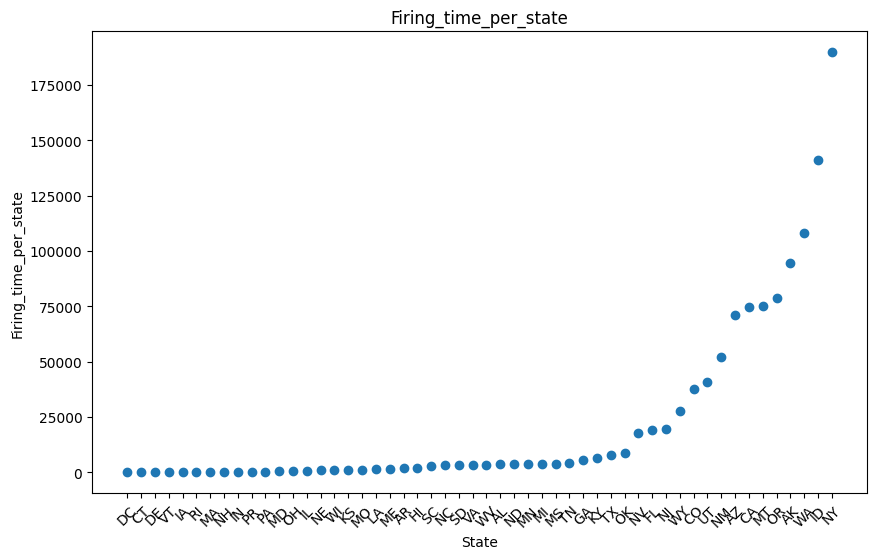

In [361]:
pandas_df = my_df.groupBy('STATE').agg(sum('Firing_time').alias('Firing_time_per_state')).toPandas().sort_values('Firing_time_per_state')

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.scatter(pandas_df["STATE"], pandas_df["Firing_time_per_state"])
plt.xlabel("State")
plt.ylabel("Firing_time_per_state")
plt.title("Duration of wildfire in each state (days)")
plt.xticks(rotation=45)
plt.show()


In [358]:
pandas_df.sort_values('Firing_time_per_state')

,STATE,Firing_time_per_state
5,DC,1
18,CT,13
23,DE,14
21,VT,21
35,IA,23
8,RI,40
42,MA,54
11,NH,78
31,IN,123
49,PR,235


In [288]:
my_df.groupBy('month').agg(sum('Firing_time').alias('Firing_time_per_month')).orderBy(desc('Firing_time_per_month')).show()


+-----+---------------------+
|month|Firing_time_per_month|
+-----+---------------------+
|    8|               283631|
|    7|               266334|
|    6|               149774|
|    4|               123210|
|    5|                83861|
|    9|                78110|
|    3|                49350|
|   10|                25489|
|    1|                22211|
|    2|                16167|
|   11|                11272|
|   12|               -31430|
+-----+---------------------+



In [359]:
my_df.count()

988934

In [53]:
path

'/home/danial/Desktop/mygis/Geospatial_Data_Science/My GIS Projects/'

<Figure size 1200x800 with 0 Axes>

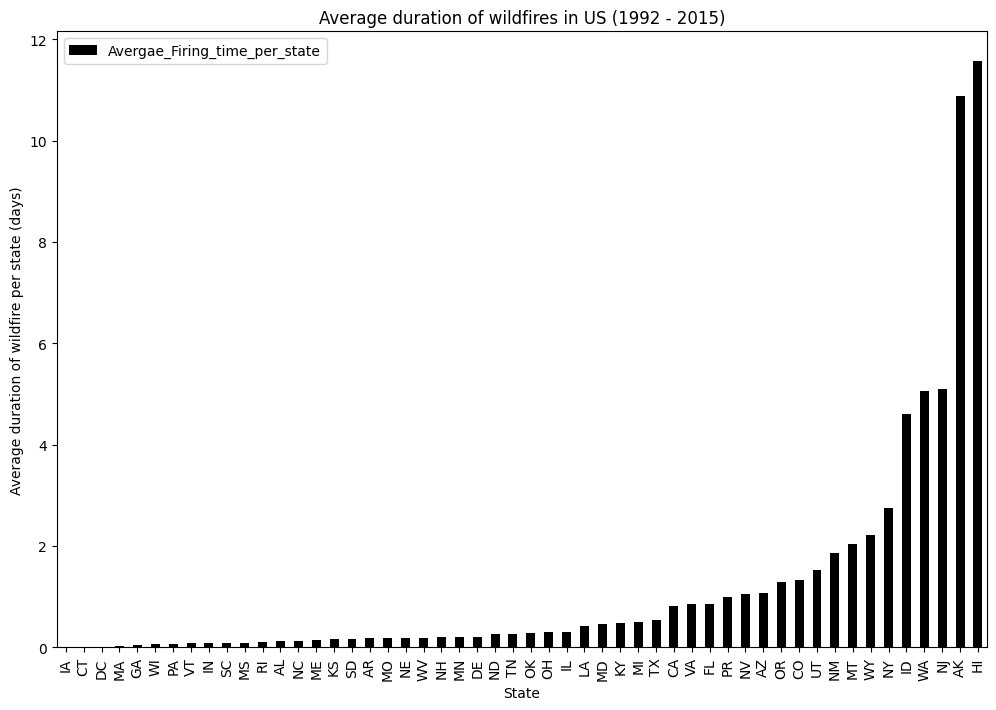

In [54]:
pandas_df = my_df.groupBy('STATE').agg(F.avg('Firing_time').alias('Avergae_Firing_time_per_state')).toPandas().sort_values('Avergae_Firing_time_per_state')

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
# plt.scatter(pandas_df["STATE"], pandas_df["Avergae_Firing_time_per_state"], color='black')
ax = pandas_df.plot(x='STATE', y='Avergae_Firing_time_per_state', kind='bar', color='black', figsize=(12, 8))
plt.xlabel("State")
plt.ylabel("Average duration of wildfire per state (days)")
plt.title("Average duration of wildfires in US (1992 - 2015)")
# plt.xticks(rotation=45)
plt.savefig(path+'plots/Average_duration_of_wildfires_in_US_1992_to_2015.png')
#plt.show()

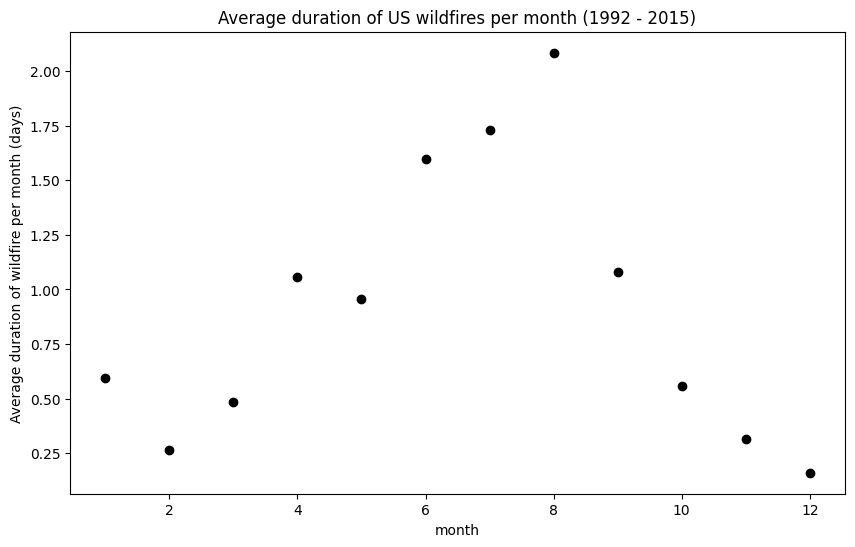

In [57]:

pandas_df = my_df.groupBy('month').agg(F.avg('Firing_time').alias('Firing_time_per_month')).toPandas()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.scatter(pandas_df["month"], pandas_df["Firing_time_per_month"], color = 'black')
plt.xlabel("month")
plt.ylabel("Average duration of wildfire per month (days)")
plt.title("Average duration of US wildfires per month (1992 - 2015)")
# plt.xticks(rotation=45)
#plt.savefig(path + f'plots/Average_duration_of_US_wildfires_per_month.png')
plt.show()


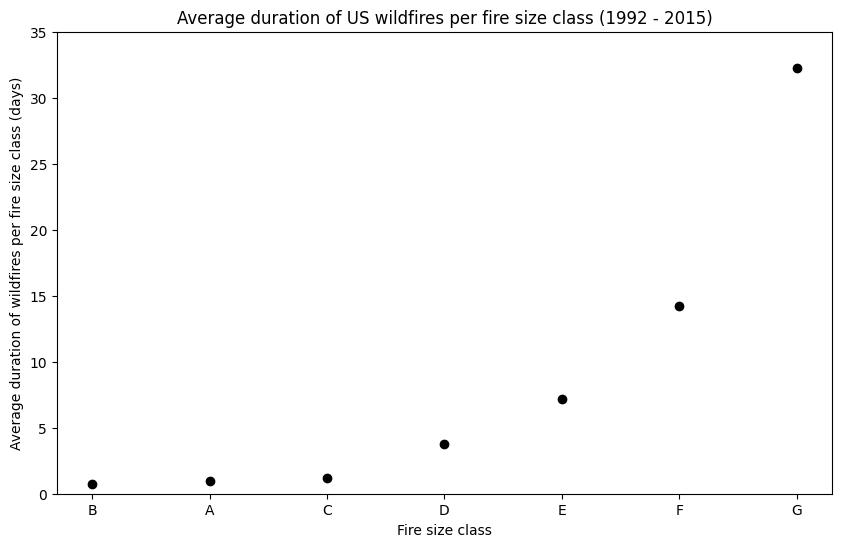

In [65]:

pandas_df = my_df.groupBy('FIRE_SIZE_CLASS').agg(F.avg('Firing_time').alias('Firing_time_per_fire_size_class')).toPandas().sort_values('Firing_time_per_fire_size_class')

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.scatter(pandas_df["FIRE_SIZE_CLASS"], pandas_df["Firing_time_per_fire_size_class"], color = 'black')
plt.ylim(0, 35)
plt.xlabel("Fire size class")
plt.ylabel("Average duration of wildfires per fire size class (days)")
plt.title("Average duration of US wildfires per fire size class (1992 - 2015)")
# plt.xticks(rotation=45)
plt.savefig(path + f'plots/Average_duration_of_US_wildfires_per_fire_size_class.png')
#plt.show()


In [71]:
df_spark = df_spark.withColumn('STAT_CAUSE_CODE', df_spark.STAT_CAUSE_CODE.cast('int'))

In [74]:
df_pd = df_spark.select('STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE').distinct().toPandas().sort_values('STAT_CAUSE_CODE')

In [75]:
spark_df_new = spark.createDataFrame(df_pd)
spark_df_new.show()

+-----------------+---------------+
| STAT_CAUSE_DESCR|STAT_CAUSE_CODE|
+-----------------+---------------+
|        Lightning|              1|
|    Equipment Use|              2|
|          Smoking|              3|
|         Campfire|              4|
|   Debris Burning|              5|
|         Railroad|              6|
|            Arson|              7|
|         Children|              8|
|    Miscellaneous|              9|
|        Fireworks|             10|
|        Powerline|             11|
|        Structure|             12|
|Missing/Undefined|             13|
+-----------------+---------------+

